In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import sys
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from IPython.display import display, HTML
from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

from sklearn.feature_selection import RFECV
np.set_printoptions(linewidth=100, suppress=True)

# (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.


In [2]:
# file address
bending1 = "AReM/bending1"
bending2 = "AReM/bending2"
cycling = "AReM/cycling"
lying = "AReM/lying"
sitting = "AReM/sitting"
standing = "AReM/standing"
walking = "AReM/walking"
addresslist = []
addresslist.append(bending1)
addresslist.append(bending2)
addresslist.append(cycling)
addresslist.append(lying)
addresslist.append(sitting)
addresslist.append(standing)
addresslist.append(walking)

In [3]:
a = pd.read_csv(bending1+'/dataset'+str('1')+'.csv',header = 4,error_bad_lines=False)
a.head()
b = pd.DataFrame(columns=a.columns)
print(a.columns)

Index(['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23'],
      dtype='object')


In [4]:
def merge_desc(df):
    desc = df.describe()
    desc.drop(['count'],inplace=True)
    desc.drop(['# Columns: time'],axis=1,inplace=True)
    vector = desc.unstack()
    vector = vector.values.reshape(1,42)
    one_desc = pd.DataFrame(vector,columns = ['mean1', 'std1', 'min1', '1st quart1','2nd quart1','3rd quart1', 'max1','mean2', 'std2', 'min2', '1st quart2','2nd quart2','3rd quart2', 'max2','mean3', 'std3', 'min3', '1st quart3','2nd quart3','3rd quart3', 'max3','mean4', 'std4', 'min4', '1st quart4','2nd quart4','3rd quart4', 'max4','mean5', 'std5', 'min5', '1st quart5','2nd quart5','3rd quart5', 'max5','mean6', 'std6', 'min6', '1st quart6','2nd quart6','3rd quart6', 'max6'])
        #name = name.append(temp,ignore_index=True)
    return one_desc

def stupid_loading(addresslist,breaknum):
    test = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','bending???'])
    test_desc = pd.DataFrame(columns = ['mean1', 'std1', 'min1', '1st quart1','2nd quart1','3rd quart1', 'max1','mean2', 'std2', 'min2', '1st quart2','2nd quart2','3rd quart2', 'max2','mean3', 'std3', 'min3', '1st quart3','2nd quart3','3rd quart3', 'max3','mean4', 'std4', 'min4', '1st quart4','2nd quart4','3rd quart4', 'max4','mean5', 'std5', 'min5', '1st quart5','2nd quart5','3rd quart5', 'max5','mean6', 'std6', 'min6', '1st quart6','2nd quart6','3rd quart6', 'max6','bending???'])
    train_desc = pd.DataFrame(columns = ['mean1', 'std1', 'min1', '1st quart1','2nd quart1','3rd quart1', 'max1','mean2', 'std2', 'min2', '1st quart2','2nd quart2','3rd quart2', 'max2','mean3', 'std3', 'min3', '1st quart3','2nd quart3','3rd quart3', 'max3','mean4', 'std4', 'min4', '1st quart4','2nd quart4','3rd quart4', 'max4','mean5', 'std5', 'min5', '1st quart5','2nd quart5','3rd quart5', 'max5','mean6', 'std6', 'min6', '1st quart6','2nd quart6','3rd quart6', 'max6','bending???'])
    train = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','bending???'])
    #we do not need break test, so start with test dataset
    for address in addresslist:
        if address == 'AReM/bending1' or address == 'AReM/bending2':
            for i in range(1,3):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                temp_ = merge_desc(temp)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                temp_['bending???'] = 0
                test_desc = test_desc.append(temp_,ignore_index=True)
            #stupid break
            end = 7
            if address == 'AReM/bending1':
                end = end + 1
            for j in range(3,end):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                temp = temp[:stop_sign]
                temp_ = merge_desc(temp)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                temp_['bending???'] = 0
                train_desc = train_desc.append(temp_,ignore_index=True)
        else:
            for i in range(1,4):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                temp_ = merge_desc(temp)
                temp['bending???'] = np.ones(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                temp_['bending???'] = 1
                test_desc = test_desc.append(temp_,ignore_index=True)
            for j in range(4,16):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                temp = temp[:stop_sign]
                temp_ = merge_desc(temp)
                temp['bending???'] = np.ones(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                temp_['bending???'] = 1
                train_desc = train_desc.append(temp_,ignore_index=True)
    return(test,test_desc,train,train_desc)
#test
a,b,c,d = stupid_loading(addresslist,4)
b

,mean1,std1,min1,1st quart1,2nd quart1,3rd quart1,max1,mean2,std2,min2,...,3rd quart5,max5,mean6,std6,min6,1st quart6,2nd quart6,3rd quart6,max6,bending???
0,40.624792,1.476967,37.25,39.2500,40.500,42.0000,45.00,0.358604,0.322605,0.0,...,36.0000,38.25,0.570583,0.582915,0.0,0.0000,0.430,1.300,1.92,0
1,42.812812,1.435550,38.00,42.0000,42.500,43.6700,45.67,0.372438,0.289158,0.0,...,34.5000,38.50,0.571083,0.601010,0.0,0.0000,0.430,1.300,3.11,0
2,24.562958,3.737514,12.75,23.1875,24.250,26.5000,51.00,0.590833,0.837408,0.0,...,27.0000,30.00,0.700188,0.693720,0.0,0.4300,0.500,0.870,4.97,0
3,27.464604,3.583582,0.00,25.5000,28.000,30.0000,42.75,0.449708,0.767197,0.0,...,20.7500,33.00,1.122125,1.012342,0.0,0.4700,0.830,1.300,6.76,0
4,37.177042,3.581301,24.25,34.5000,36.250,40.2500,45.00,2.374208,1.601799,0.0,...,21.7500,25.50,2.921729,1.852600,0.0,1.5000,2.500,3.900,9.34,1
5,37.561188,3.226507,28.75,35.2500,36.875,40.2500,44.75,2.080688,1.639258,0.0,...,21.5000,24.33,2.765896,1.769203,0.0,1.4100,2.450,3.770,9.62,1
6,37.058708,3.710180,22.00,34.5000,36.000,40.0625,44.67,2.438146,1.996887,0.0,...,21.0000,24.25,2.983750,1.815730,0.0,1.5000,2.570,4.150,8.55,1
7,27.716375,1.442253,23.50,27.0000,27.500,29.0000,30.00,0.363688,0.394817,0.0,...,10.7500,21.00,0.734271,0.613688,0.0,0.4300,0.710,1.000,4.50,1
8,44.182937,7.495615,24.75,48.0000,48.000,48.0000,48.33,0.101875,0.346756,0.0,...,5.5425,12.75,0.692771,0.675781,0.0,0.3225,0.500,0.940,3.91,1
9,48.004167,0.032038,48.00,48.0000,48.000,48.0000,48.25,0.007167,0.055106,0.0,...,10.0000,12.00,0.641229,0.388372,0.0,0.4600,0.500,0.830,2.50,1


In [5]:
def merge_desc_b(df,n):
    desc = df.describe()
    desc.drop(['count'],inplace=True)
    desc.drop(['# Columns: time'],axis=1,inplace=True)
    vector = desc.unstack()
    vector = vector.values.reshape(1,42)
    columns_ = []
    #columns_ = []
    text = ['mean1', 'std1', 'min1', '1st quart1','2nd quart1','3rd quart1', 'max1','mean2', 'std2', 'min2', '1st quart2','2nd quart2','3rd quart2', 'max2','mean3', 'std3', 'min3', '1st quart3','2nd quart3','3rd quart3', 'max3','mean4', 'std4', 'min4', '1st quart4','2nd quart4','3rd quart4', 'max4','mean5', 'std5', 'min5', '1st quart5','2nd quart5','3rd quart5', 'max5','mean6', 'std6', 'min6', '1st quart6','2nd quart6','3rd quart6', 'max6']
    for k in range(len(text)):
        text[k] = text[k] + str(n)
    columns_.extend(text)
    one_desc = pd.DataFrame(vector,columns = columns_)
        #name = name.append(temp,ignore_index=True)
    return one_desc

def stupid_loading_b(addresslist,breaknum):
    test = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','bending???'])
    train = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','bending???'])
    #break the  series
    for address in addresslist:
        #bending 1 & 2
        if address == 'AReM/bending1' or address == 'AReM/bending2':
            #test
            for i in range(1,3):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                init['bending???'] = 0
                if i == 1 and address == 'AReM/bending1':
                    test_desc = init
                else:
                    test_desc = test_desc.append(init,ignore_index=True)
            end = 7
            if address == 'AReM/bending1':
                end = end + 1
            #train
            for j in range(3,end):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                init['bending???'] = 0
                if j == 3 and address == 'AReM/bending1':
                    train_desc = init
                else:
                    train_desc = train_desc.append(init,ignore_index=True)
        # other dataset
        else:
            #test
            for i in range(1,4):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.ones(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                init['bending???'] = 1
                if i == 1 and address == 'AReM/bending1':
                    test_desc = init
                else:
                    test_desc = test_desc.append(init,ignore_index=True)            #train
            for j in range(4,16):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                init['bending???'] = 1
                if j == 3 and address == 'AReM/bending1':
                    train_desc = init
                else:
                    train_desc = train_desc.append(init,ignore_index=True)
    return(test,test_desc,train,train_desc)
#test
a,b,c,d = stupid_loading_b(addresslist,1)


In [6]:
#delete some .....
def stupid_loading_c(addresslist,breaknum):
    test = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','bending???'])
    train = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','bending???'])
    #break the  series
    for address in addresslist:
        #bending 1 & 2
        if address == 'AReM/bending1' or address == 'AReM/bending2':
            #test
            for i in range(1,3):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                init['bending???'] = 0
                if i == 1 and address == 'AReM/bending1':
                    test_desc = init
                else:
                    test_desc = test_desc.append(init,ignore_index=True)
            end = 7
            if address == 'AReM/bending1':
                end = end + 1
            #train
            for j in range(3,end):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                init['bending???'] = 0
                if j == 3 and address == 'AReM/bending1':
                    train_desc = init
                else:
                    train_desc = train_desc.append(init,ignore_index=True)
        # other dataset
        else:
            #test
            for i in range(1,4):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.ones(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                init['bending???'] = 1
                if i == 1 and address == 'AReM/bending1':
                    test_desc = init
                else:
                    test_desc = test_desc.append(init,ignore_index=True)            #train
            for j in range(4,16):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                init['bending???'] = 1
                if j == 3 and address == 'AReM/bending1':
                    train_desc = init
                else:
                    train_desc = train_desc.append(init,ignore_index=True)
    for i in range(1,7):
        for j in range(1,(breaknum+1)):
            test_desc = test_desc.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
    for i in range(1,7):
        for j in range(1,(breaknum+1)):
            train_desc = train_desc.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])  
    return(test,test_desc,train,train_desc)
#test
a,b,c,d = stupid_loading_c(addresslist,1)
b.head()

,mean11,min11,max11,mean21,min21,max21,mean31,min31,max31,mean41,min41,max41,mean51,min51,max51,mean61,min61,max61,bending???
0,40.624792,37.25,45.00,0.358604,0.0,1.30,19.040937,4.0,29.50,0.832542,0.0,7.23,34.311292,27.25,38.25,0.570583,0.0,1.92,0
1,42.812812,38.00,45.67,0.372438,0.0,1.22,20.096979,2.0,29.50,0.876438,0.0,5.76,33.024583,27.67,38.50,0.571083,0.0,3.11,0
2,24.562958,12.75,51.00,0.590833,0.0,6.87,19.121333,0.0,25.33,0.736771,0.0,6.76,23.493042,10.67,30.00,0.700188,0.0,4.97,0
3,27.464604,0.00,42.75,0.449708,0.0,7.76,20.842542,7.5,35.00,0.779917,0.0,5.76,17.617937,0.00,33.00,1.122125,0.0,6.76,0
4,37.177042,24.25,45.00,2.374208,0.0,8.58,16.531083,5.5,26.75,2.910604,0.0,8.05,19.607250,7.00,25.50,2.921729,0.0,9.34,1


In [115]:
def merge_ds(st,end,addr):
    name = pd.read_csv(addr+'/dataset'+str(st)+'.csv',header = 4,error_bad_lines=False)
    #print('job done!!!',addr+str(st))
    for i in range(st+1,end+1):
        #print(i)
        temp = pd.read_csv(addr+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
        #print(temp)
        name = name.append(temp)
        #print(name.shape)
        #print('job done!!!',addr+str(i))
    return name

In [4]:
#test dataset
b1_test = merge_ds(1,2,bending1)
b2_test = merge_ds(1,2,bending2)
c_test = merge_ds(1,3,cycling)
l_test = merge_ds(1,3,lying)
si_test = merge_ds(1,3,sitting)
st_test = merge_ds(1,3,standing)
w_test = merge_ds(1,3,walking)

In [5]:
#train dataset
b1_train = merge_ds(3,7,bending1)
b2_train = merge_ds(3,6,bending2)
c_train = merge_ds(4,15,cycling)
l_train = merge_ds(4,15,lying)
si_train = merge_ds(4,15,sitting)
st_train = merge_ds(4,15,standing)
w_train = merge_ds(4,15,walking)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


# (c) Feature Extraction .Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.


# i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).


Mean 
Standard Deviation 
Variance
Root Mean Square 
Averaged derivatives 
Skewness 
Kurtosis
Interquartile Range 
Zero Crossing Rate
Mean Crossing Rate 
Pairwise Correlation 
Spectral Entropy 
The Teager energy operator
The Hilbert envelope
The LB-Keogh
Wiener and Hammerstein nonlinear filters

# ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.Your new dataset will look like this:where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.

In [102]:
def merge_desc(st,end,addr):
    temp = pd.read_csv(addr+'/dataset'+str(st)+'.csv',header = 4,error_bad_lines=False)
    desc = temp.describe()
    desc.drop(['count'],inplace=True)
    desc.drop(['# Columns: time'],axis=1,inplace=True)
    vector = desc.unstack()
    vector = vector.values.reshape(1,42)
    name = pd.DataFrame(vector,columns = ['mean1', 'std1', 'min1', '1st quart1','2nd quart1','3rd quart1', 'max1','mean2', 'std2', 'min2', '1st quart2','2nd quart2','3rd quart2', 'max2','mean3', 'std3', 'min3', '1st quart3','2nd quart3','3rd quart3', 'max3','mean4', 'std4', 'min4', '1st quart4','2nd quart4','3rd quart4', 'max4','mean5', 'std5', 'min5', '1st quart5','2nd quart5','3rd quart5', 'max5','mean6', 'std6', 'min6', '1st quart6','2nd quart6','3rd quart6', 'max6'])
    for i in range(st+1,end+1):
        temp = pd.read_csv(addr+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
        desc = temp.describe()
        desc.drop(['count'],inplace=True)
        desc.drop(['# Columns: time'],axis=1,inplace=True)
        vector = desc.unstack()
        vector = vector.values.reshape(1,42)
        temp = pd.DataFrame(vector,columns = ['mean1', 'std1', 'min1', '1st quart1','2nd quart1','3rd quart1', 'max1','mean2', 'std2', 'min2', '1st quart2','2nd quart2','3rd quart2', 'max2','mean3', 'std3', 'min3', '1st quart3','2nd quart3','3rd quart3', 'max3','mean4', 'std4', 'min4', '1st quart4','2nd quart4','3rd quart4', 'max4','mean5', 'std5', 'min5', '1st quart5','2nd quart5','3rd quart5', 'max5','mean6', 'std6', 'min6', '1st quart6','2nd quart6','3rd quart6', 'max6'])
        name = name.append(temp,ignore_index=True)
        #print(name.shape)
        #print('job done!!!',addr+str(i))
    return name

In [103]:
# pre-process the abnormal dataset
temp = pd.read_csv(bending2+'/dataset'+str(4)+'.csv',header = 4,error_bad_lines=False)
e = np.zeros(shape=(temp.shape[0],temp.shape[1]))
for i in range(temp.shape[0]):
    list=[]
    a = temp.iloc[i,0].split(' ')
    a.remove('')
    e[i]=a
# Columns: time avg_rss12	var_rss12	avg_rss13	var_rss13	avg_rss23	var_rss23
e
dataset4 = pd.DataFrame(e,columns = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'])
dataset4.to_csv(path_or_buf=bending2+'/dataset4.csv')

AttributeError: 'numpy.float64' object has no attribute 'split'

In [106]:
b1_desc = merge_desc(1,7,bending1)
b2_desc = merge_desc(1,6,bending2)
#b2_desc = b2_desc.append(b2_4,ignore_index=True)
#b2_56 = merge_desc(5,6,bending2)
#b2_desc = b2_desc.append(b2_56,ignore_index=True)
c_desc = merge_desc(1,15,cycling)
l_desc = merge_desc(1,15,lying)
si_desc = merge_desc(1,15,sitting)
st_desc = merge_desc(1,15,standing)
w_desc = merge_desc(1,15,walking)

In [107]:
des_table = b1_desc
des_table = des_table.append(b2_desc,ignore_index=True)
des_table = des_table.append(c_desc,ignore_index=True)
des_table = des_table.append(l_desc,ignore_index=True)
des_table = des_table.append(si_desc,ignore_index=True)
des_table = des_table.append(st_desc,ignore_index=True)
des_table = des_table.append(w_desc,ignore_index=True)

In [109]:
instance = pd.DataFrame(np.arange(1,89),columns=['Instance'])
des_table.insert(0,'Instance',instance)


ValueError: cannot insert Instance, already exists

In [110]:
#train+test
des_table.head()

,Instance,mean1,std1,min1,1st quart1,2nd quart1,3rd quart1,max1,mean2,std2,min2,1st quart2,2nd quart2,3rd quart2,max2,mean3,std3,min3,1st quart3,2nd quart3,3rd quart3,max3,mean4,std4,min4,1st quart4,2nd quart4,3rd quart4,max4,mean5,std5,min5,1st quart5,2nd quart5,3rd quart5,max5,mean6,std6,min6,1st quart6,2nd quart6,3rd quart6,max6
0,1,40.624792,1.476967,37.25,39.25,40.50,42.00,45.00,0.358604,0.322605,0.0,0.00,0.43,0.50,1.30,19.040937,4.462952,4.0,16.00,19.250,23.2500,29.50,0.832542,0.965659,0.0,0.00,0.50,1.120,7.23,34.311292,2.188449,27.25,33.0000,35.0,36.00,38.25,0.570583,0.582915,0.0,0.0,0.43,1.30,1.92
1,2,42.812812,1.435550,38.00,42.00,42.50,43.67,45.67,0.372438,0.289158,0.0,0.00,0.47,0.50,1.22,20.096979,3.893737,2.0,19.00,21.000,22.2500,29.50,0.876438,1.047259,0.0,0.00,0.50,1.145,5.76,33.024583,1.995255,27.67,32.0000,33.0,34.50,38.50,0.571083,0.601010,0.0,0.0,0.43,1.30,3.11
2,3,43.954500,1.558835,35.00,43.00,44.33,45.00,47.40,0.426250,0.338690,0.0,0.00,0.47,0.50,1.70,22.122354,3.030943,6.5,19.75,23.000,24.0000,29.75,0.497313,0.550657,0.0,0.00,0.43,0.830,4.44,35.588458,1.999604,29.00,35.3625,36.0,36.50,38.50,0.493292,0.513506,0.0,0.0,0.43,0.94,1.79
3,4,42.179813,3.670666,33.00,39.15,43.50,45.00,47.75,0.696042,0.630860,0.0,0.00,0.50,1.12,3.00,22.183625,3.810469,8.5,20.50,23.000,24.3725,30.00,0.989917,0.953730,0.0,0.43,0.83,1.300,5.15,33.493917,3.849448,20.00,30.4575,35.0,36.33,38.67,0.613521,0.524317,0.0,0.0,0.50,1.00,2.18
4,5,41.678063,2.243490,33.00,41.33,41.75,42.75,45.75,0.535979,0.405469,0.0,0.43,0.50,0.71,2.83,19.006562,4.087107,3.0,16.50,19.125,22.0625,28.25,0.841875,0.928801,0.0,0.43,0.50,1.120,6.42,29.857083,2.411026,23.67,28.4575,30.0,31.25,37.50,0.383292,0.389164,0.0,0.0,0.43,0.50,1.79


In [116]:
#maybe the other way....
test,test_desc,train,train_desc = stupid_loading(addresslist,1)
#only train
train_desc.head()

fuck!
fuck!
shit
shit
shit
shit
shit


,mean1,std1,min1,1st quart1,2nd quart1,3rd quart1,max1,mean2,std2,min2,1st quart2,2nd quart2,3rd quart2,max2,mean3,std3,min3,1st quart3,2nd quart3,3rd quart3,max3,mean4,std4,min4,1st quart4,2nd quart4,3rd quart4,max4,mean5,std5,min5,1st quart5,2nd quart5,3rd quart5,max5,mean6,std6,min6,1st quart6,2nd quart6,3rd quart6,max6,bending???
0,43.954500,1.558835,35.00,43.00,44.33,45.00,47.40,0.426250,0.338690,0.0,0.00,0.47,0.50,1.70,22.122354,3.030943,6.50,19.75,23.000,24.0000,29.75,0.497313,0.550657,0.0,0.00,0.43,0.83,4.44,35.588458,1.999604,29.00,35.3625,36.00,36.50,38.50,0.493292,0.513506,0.0,0.00,0.43,0.94,1.79,0
1,42.179813,3.670666,33.00,39.15,43.50,45.00,47.75,0.696042,0.630860,0.0,0.00,0.50,1.12,3.00,22.183625,3.810469,8.50,20.50,23.000,24.3725,30.00,0.989917,0.953730,0.0,0.43,0.83,1.30,5.15,33.493917,3.849448,20.00,30.4575,35.00,36.33,38.67,0.613521,0.524317,0.0,0.00,0.50,1.00,2.18,0
2,41.678063,2.243490,33.00,41.33,41.75,42.75,45.75,0.535979,0.405469,0.0,0.43,0.50,0.71,2.83,19.006562,4.087107,3.00,16.50,19.125,22.0625,28.25,0.841875,0.928801,0.0,0.43,0.50,1.12,6.42,29.857083,2.411026,23.67,28.4575,30.00,31.25,37.50,0.383292,0.389164,0.0,0.00,0.43,0.50,1.79,0
3,43.454958,1.386098,37.00,42.50,43.25,45.00,48.00,0.378083,0.315566,0.0,0.00,0.47,0.50,1.58,15.793333,3.847638,5.75,13.00,15.000,18.2700,27.00,0.849354,0.995761,0.0,0.43,0.50,1.12,10.03,23.034792,2.488862,8.00,22.2500,23.50,24.00,33.50,0.679646,0.622534,0.0,0.43,0.50,0.87,5.26,0
4,43.969125,1.618364,36.25,43.31,44.50,44.67,48.00,0.413125,0.263111,0.0,0.43,0.47,0.50,1.50,15.868021,3.742420,1.50,14.25,16.250,18.0000,26.33,0.666354,0.788985,0.0,0.00,0.47,0.94,5.17,22.103750,3.318301,11.33,20.5000,21.67,23.75,30.75,0.555313,0.487826,0.0,0.00,0.49,0.83,2.96,0


# iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [117]:
values = des_table.values
type(des_table.iloc[:,1].values)
a=np.std(des_table.iloc[:,1].values,ddof=1)

In [118]:
data = des_table.iloc[:,9].values
data

array([0.32260476, 0.28915848, 0.33869037, 0.6308603 , 0.40546872, 0.31556635, 0.26311096,
       0.8374081 , 0.76719667, 0.78995705, 0.27583318, 0.73444445, 0.56666791, 1.60179929,
       1.63925761, 1.99688727, 1.8866893 , 2.07390254, 1.9243659 , 2.11595768, 1.72490137,
       1.64317458, 1.82140388, 1.89239694, 2.14057607, 2.23795546, 2.09200162, 1.60179929,
       0.39481708, 0.34675565, 0.05510564, 0.48408596, 0.19458464, 0.14554591, 0.16037908,
       0.19581458, 0.56272891, 0.39481708, 0.05510564, 0.19458464, 0.16037908, 0.56272891,
       0.39481708, 0.40358091, 0.36581964, 0.25117594, 0.2588155 , 0.77299211, 0.53878339,
       0.48893738, 0.26035683, 0.27158786, 0.48541666, 0.39406436, 0.29580469, 0.14798437,
       0.24638853, 0.38254381, 0.37059057, 0.30741293, 0.44651082, 0.41371868, 0.37411663,
       0.39291425, 0.46454108, 0.36726702, 0.26988859, 0.38740491, 0.34943041, 0.31358534,
       0.36838322, 0.32880731, 0.35811314, 2.2711019 , 2.33868466, 2.48020611, 2.62551611,

In [119]:
columns = des_table.columns.values.tolist()
columns[1:len(columns)]
a = pd.Series(columns[1:len(columns)])
a

0          mean1
1           std1
2           min1
3     1st quart1
4     2nd quart1
5     3rd quart1
6           max1
7          mean2
8           std2
9           min2
10    1st quart2
11    2nd quart2
12    3rd quart2
13          max2
14         mean3
15          std3
16          min3
17    1st quart3
18    2nd quart3
19    3rd quart3
20          max3
21         mean4
22          std4
23          min4
24    1st quart4
25    2nd quart4
26    3rd quart4
27          max4
28         mean5
29          std5
30          min5
31    1st quart5
32    2nd quart5
33    3rd quart5
34          max5
35         mean6
36          std6
37          min6
38    1st quart6
39    2nd quart6
40    3rd quart6
41          max6
dtype: object

In [120]:
#bootstrap

bs_data = np.zeros(shape=(42,3))
bs_df = pd.DataFrame(bs_data,columns=['lower','upper','estimate'])
for k in range(1,43):
    bootstraps = []
    from sklearn.utils import resample
    n_iterations = 1000
    data = des_table.iloc[:,k].values
    for i in range(n_iterations):
        boot = resample(data, replace=True, n_samples=88)
        bootstraps.append(boot)
        #print('Bootstrap Sample: %s' % boot)
        #oob = [x for x in data if x not in boot]
        #print('OOB Sample: %s' % oob)
    statistics = []
    lista = []
    for boot in bootstraps:
    #sample = select_sample_with_replacement(data)
        sample = boot
        stat = np.std(sample,ddof=1)
        statistics.append(stat)
    alpha = 90
    ordered = sorted(statistics)
    estimate = np.mean(ordered)
    lower = np.percentile(ordered, (100-alpha)/2)
    upper = np.percentile(ordered, alpha+((100-alpha)/2))
    lista.append(lower)
    lista.append(upper)
    lista.append(estimate)
    bs_df.loc[k-1]=lista

In [121]:
bs_df.insert(0,'term',a)
bs_df

,term,lower,upper,estimate
0,mean1,4.710308,5.881988,5.291437
1,std1,1.577269,1.948213,1.758984
2,min1,8.215893,10.698828,9.448282
3,1st quart1,5.571288,6.634030,6.104539
4,2nd quart1,4.749109,6.036955,5.386923
5,3rd quart1,4.351404,5.872858,5.099092
6,max1,3.273612,5.296409,4.330586
7,mean2,1.403492,1.710761,1.560719
8,std2,0.802283,0.938944,0.876942
9,min2,0.000000,0.000000,0.000000


# iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

(max,mean,min),because I want to normalize the dataset,so mean is better than median, and the min and max are more distinct can help to find the upper and lower limit characteristics of data. Also all these 3 features are very representative.

# (d) Binary Classification Using Logistic Regression

# Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).3

In [217]:
des_t2 = des_table
for i in range(1,7):
    des_t2 = des_t2.drop(['1st quart'+str(i),'1st quart'+str(i),'2nd quart'+str(i),'3rd quart'+str(i),'std'+str(i)],axis=1)
des_t2.head()

,Instance,mean1,min1,max1,mean2,min2,max2,mean3,min3,max3,mean4,min4,max4,mean5,min5,max5,mean6,min6,max6
0,1,40.624792,37.25,45.00,0.358604,0.0,1.30,19.040937,4.0,29.50,0.832542,0.0,7.23,34.311292,27.25,38.25,0.570583,0.0,1.92
1,2,42.812812,38.00,45.67,0.372438,0.0,1.22,20.096979,2.0,29.50,0.876438,0.0,5.76,33.024583,27.67,38.50,0.571083,0.0,3.11
2,3,43.954500,35.00,47.40,0.426250,0.0,1.70,22.122354,6.5,29.75,0.497313,0.0,4.44,35.588458,29.00,38.50,0.493292,0.0,1.79
3,4,42.179813,33.00,47.75,0.696042,0.0,3.00,22.183625,8.5,30.00,0.989917,0.0,5.15,33.493917,20.00,38.67,0.613521,0.0,2.18
4,5,41.678063,33.00,45.75,0.535979,0.0,2.83,19.006562,3.0,28.25,0.841875,0.0,6.42,29.857083,23.67,37.50,0.383292,0.0,1.79


In [218]:
for i in range(3,6):
    des_t2 = des_t2.drop(['mean'+str(i),'min'+str(i),'max'+str(i)],axis=1)
des_t2.head()

,Instance,mean1,min1,max1,mean2,min2,max2,mean6,min6,max6
0,1,40.624792,37.25,45.00,0.358604,0.0,1.30,0.570583,0.0,1.92
1,2,42.812812,38.00,45.67,0.372438,0.0,1.22,0.571083,0.0,3.11
2,3,43.954500,35.00,47.40,0.426250,0.0,1.70,0.493292,0.0,1.79
3,4,42.179813,33.00,47.75,0.696042,0.0,3.00,0.613521,0.0,2.18
4,5,41.678063,33.00,45.75,0.535979,0.0,2.83,0.383292,0.0,1.79


In [219]:
bending_tr = des_t2.loc[2:6]

In [229]:
bending_tr = bending_tr.append(des_t2.loc[9:12])

In [238]:
bending_tr

,Instance,mean1,min1,max1,mean2,min2,max2,mean6,min6,max6
2,3,43.954500,35.00,47.40,0.426250,0.0,1.70,0.493292,0.0,1.79
3,4,42.179813,33.00,47.75,0.696042,0.0,3.00,0.613521,0.0,2.18
4,5,41.678063,33.00,45.75,0.535979,0.0,2.83,0.383292,0.0,1.79
5,6,43.454958,37.00,48.00,0.378083,0.0,1.58,0.679646,0.0,5.26
6,7,43.969125,36.25,48.00,0.413125,0.0,1.50,0.555313,0.0,2.96
9,10,32.586208,21.00,50.00,0.516125,0.0,9.90,1.162042,0.0,13.61
10,11,29.881938,27.50,33.00,0.256438,0.0,1.00,0.701625,0.0,6.40
11,12,30.938104,19.00,45.50,0.467167,0.0,6.40,1.107354,0.0,6.73
12,13,31.058250,25.00,47.50,0.405458,0.0,6.38,1.098104,0.0,4.92


In [230]:
other_tr = des_t2.loc[16:27]
other_tr = other_tr.append(des_t2.loc[31:42])
other_tr = other_tr.append(des_t2.loc[46:57])
other_tr = other_tr.append(des_t2.loc[61:72])
other_tr = other_tr.append(des_t2.loc[76:87])

In [231]:
other_tr.head()

,Instance,mean1,min1,max1,mean2,min2,max2,mean6,min6,max6
16,17,36.228396,19.00,44.00,2.831687,0.0,12.28,3.480687,0.0,9.98
17,18,36.687292,26.50,44.33,2.973042,0.0,12.89,3.073312,0.0,8.19
18,19,37.114312,25.33,45.00,2.730000,0.0,10.84,3.076354,0.0,9.50
19,20,36.863375,26.75,44.75,2.757312,0.0,11.68,2.773312,0.0,8.81
20,21,36.957458,26.25,44.25,2.420083,0.0,8.64,2.934625,0.0,8.34


In [232]:
All_tr = bending_tr
All_tr = All_tr.append(other_tr)
All_tr

,Instance,mean1,min1,max1,mean2,min2,max2,mean6,min6,max6
2,3,43.954500,35.00,47.40,0.426250,0.0,1.70,0.493292,0.00,1.79
3,4,42.179813,33.00,47.75,0.696042,0.0,3.00,0.613521,0.00,2.18
4,5,41.678063,33.00,45.75,0.535979,0.0,2.83,0.383292,0.00,1.79
5,6,43.454958,37.00,48.00,0.378083,0.0,1.58,0.679646,0.00,5.26
6,7,43.969125,36.25,48.00,0.413125,0.0,1.50,0.555313,0.00,2.96
9,10,32.586208,21.00,50.00,0.516125,0.0,9.90,1.162042,0.00,13.61
10,11,29.881938,27.50,33.00,0.256438,0.0,1.00,0.701625,0.00,6.40
11,12,30.938104,19.00,45.50,0.467167,0.0,6.40,1.107354,0.00,6.73
12,13,31.058250,25.00,47.50,0.405458,0.0,6.38,1.098104,0.00,4.92
16,17,36.228396,19.00,44.00,2.831687,0.0,12.28,3.480687,0.00,9.98


In [226]:
other_tr.columns[1:10]

Index(['mean1', 'min1', 'max1', 'mean2', 'min2', 'max2', 'mean6', 'min6',
       'max6'],
      dtype='object')

['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


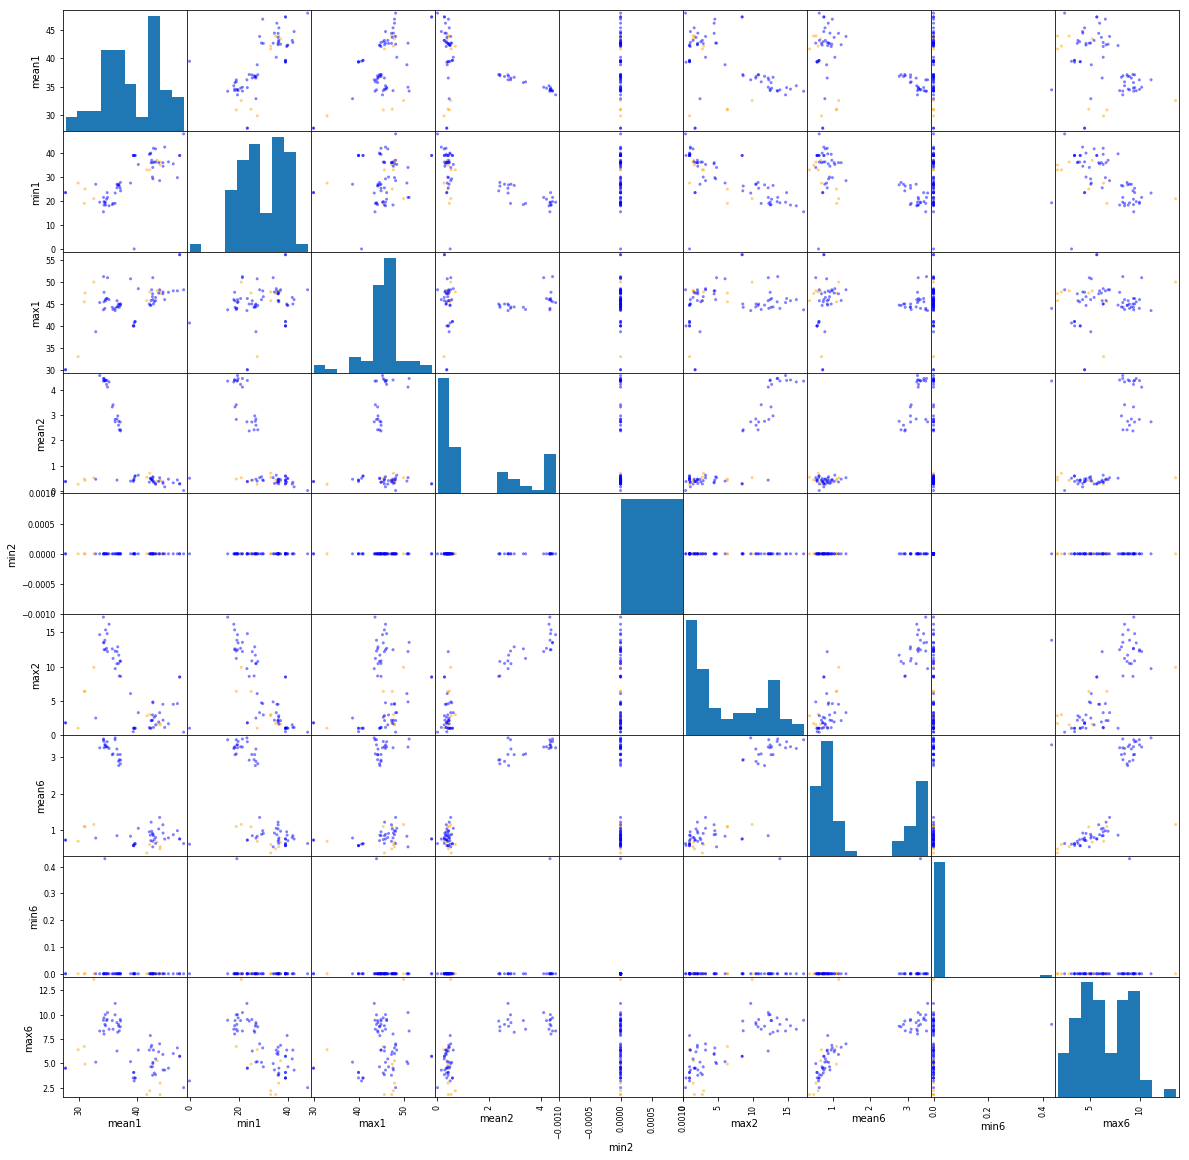

In [239]:
import warnings
warnings.filterwarnings('ignore')
def draw_many_plots(df):
    cl= []
    for i in df["Instance"]:
        if int(i) <14:
            cl.append('orange')
        else:
            cl.append('blue')
    print(cl)
    pd.plotting.scatter_matrix(df.iloc[:,1:10], color=cl, figsize=(20,20))
draw_many_plots(All_tr)

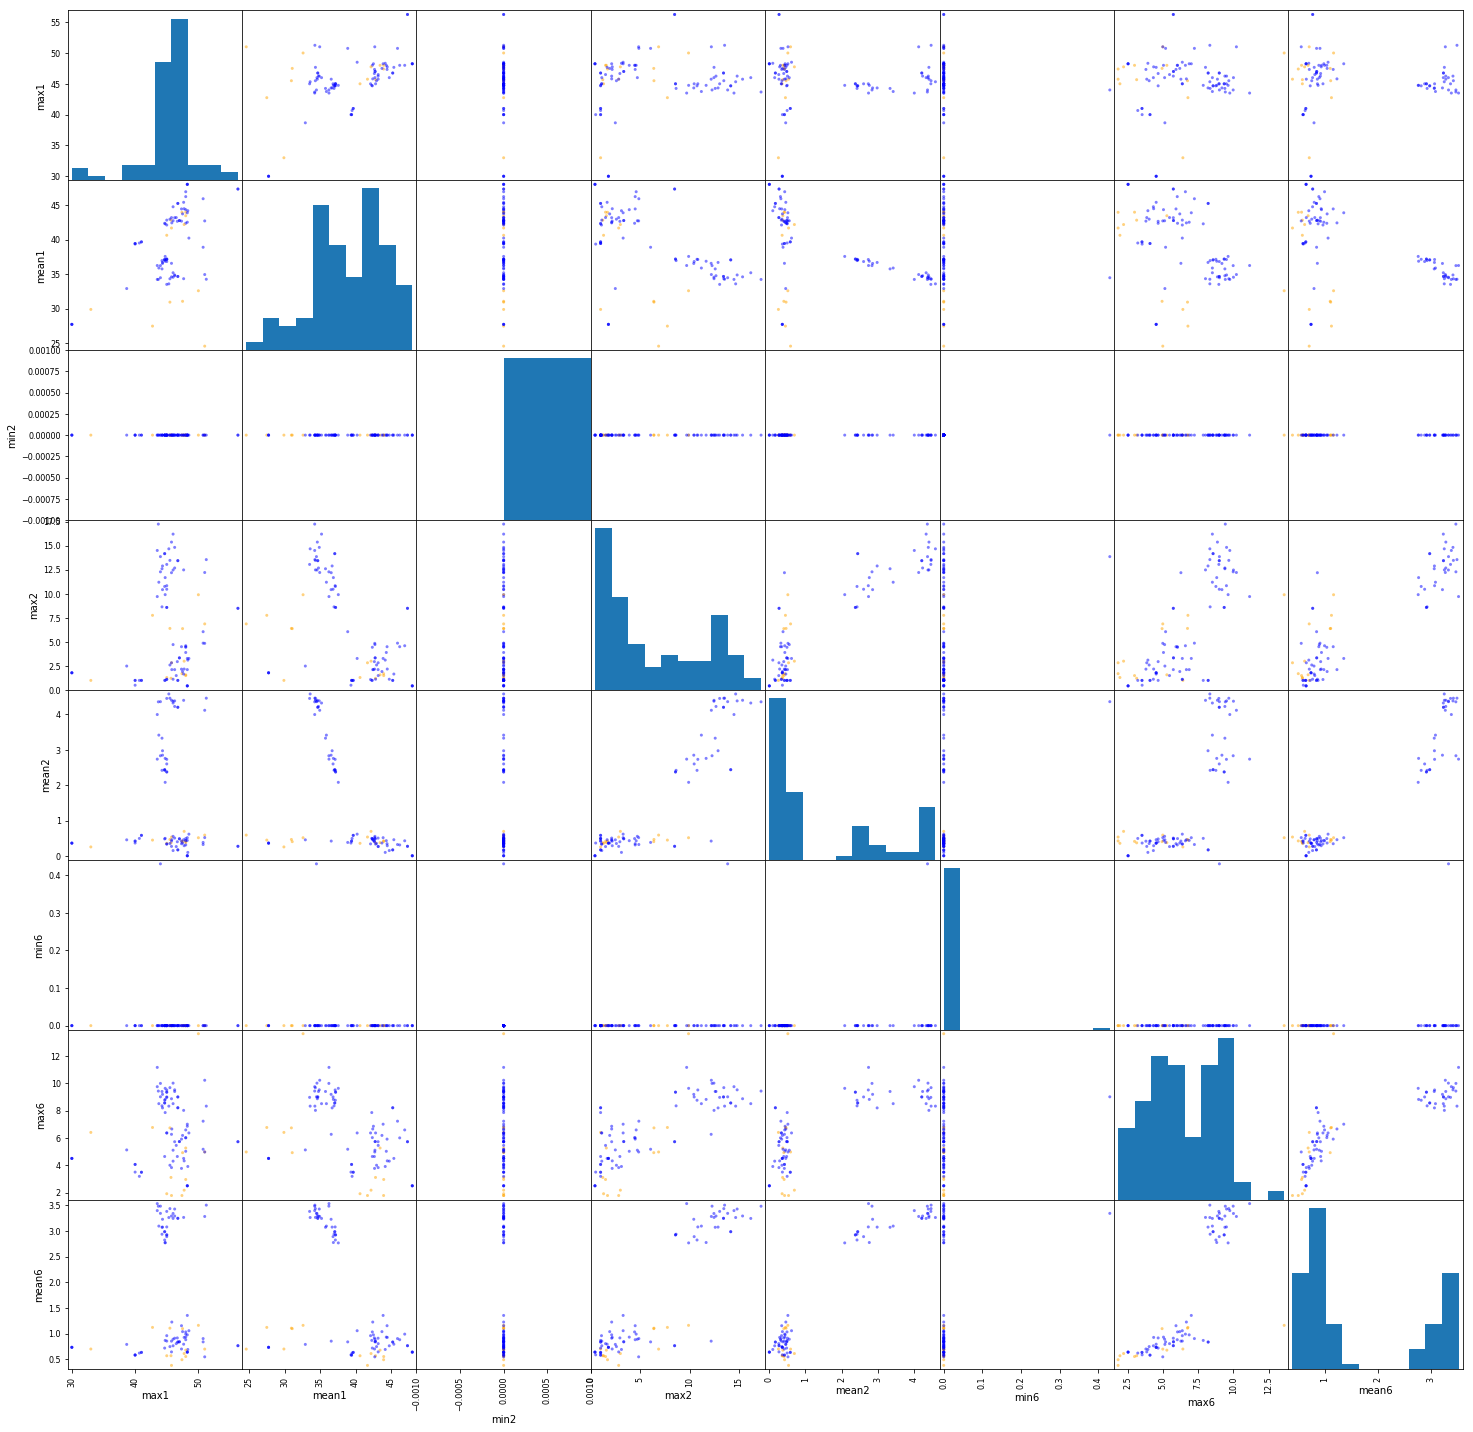

In [321]:
#with new loading function
All_desc = test_desc.append(train_desc)
#All_desc[['min1', 'max1', 'mean1', 'min2', 'max2', 'mean2', 'min6', 'max6', 'mean6', 'bending???']]
def draw_many_plots(df):
    cl= []
    for i in df["bending???"]:
        if int(i)==0:
            cl.append('orange')
        else:
            cl.append('blue')
    pd.plotting.scatter_matrix(df.iloc[:,1:10], color=cl, figsize=(25,25))
draw_many_plots(All_desc[['min1', 'max1', 'mean1', 'min2', 
                         'max2', 'mean2', 'min6', 'max6', 'mean6', 'bending???']])

# Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i?


fuck!
fuck!
shit
shit
shit
shit
shit


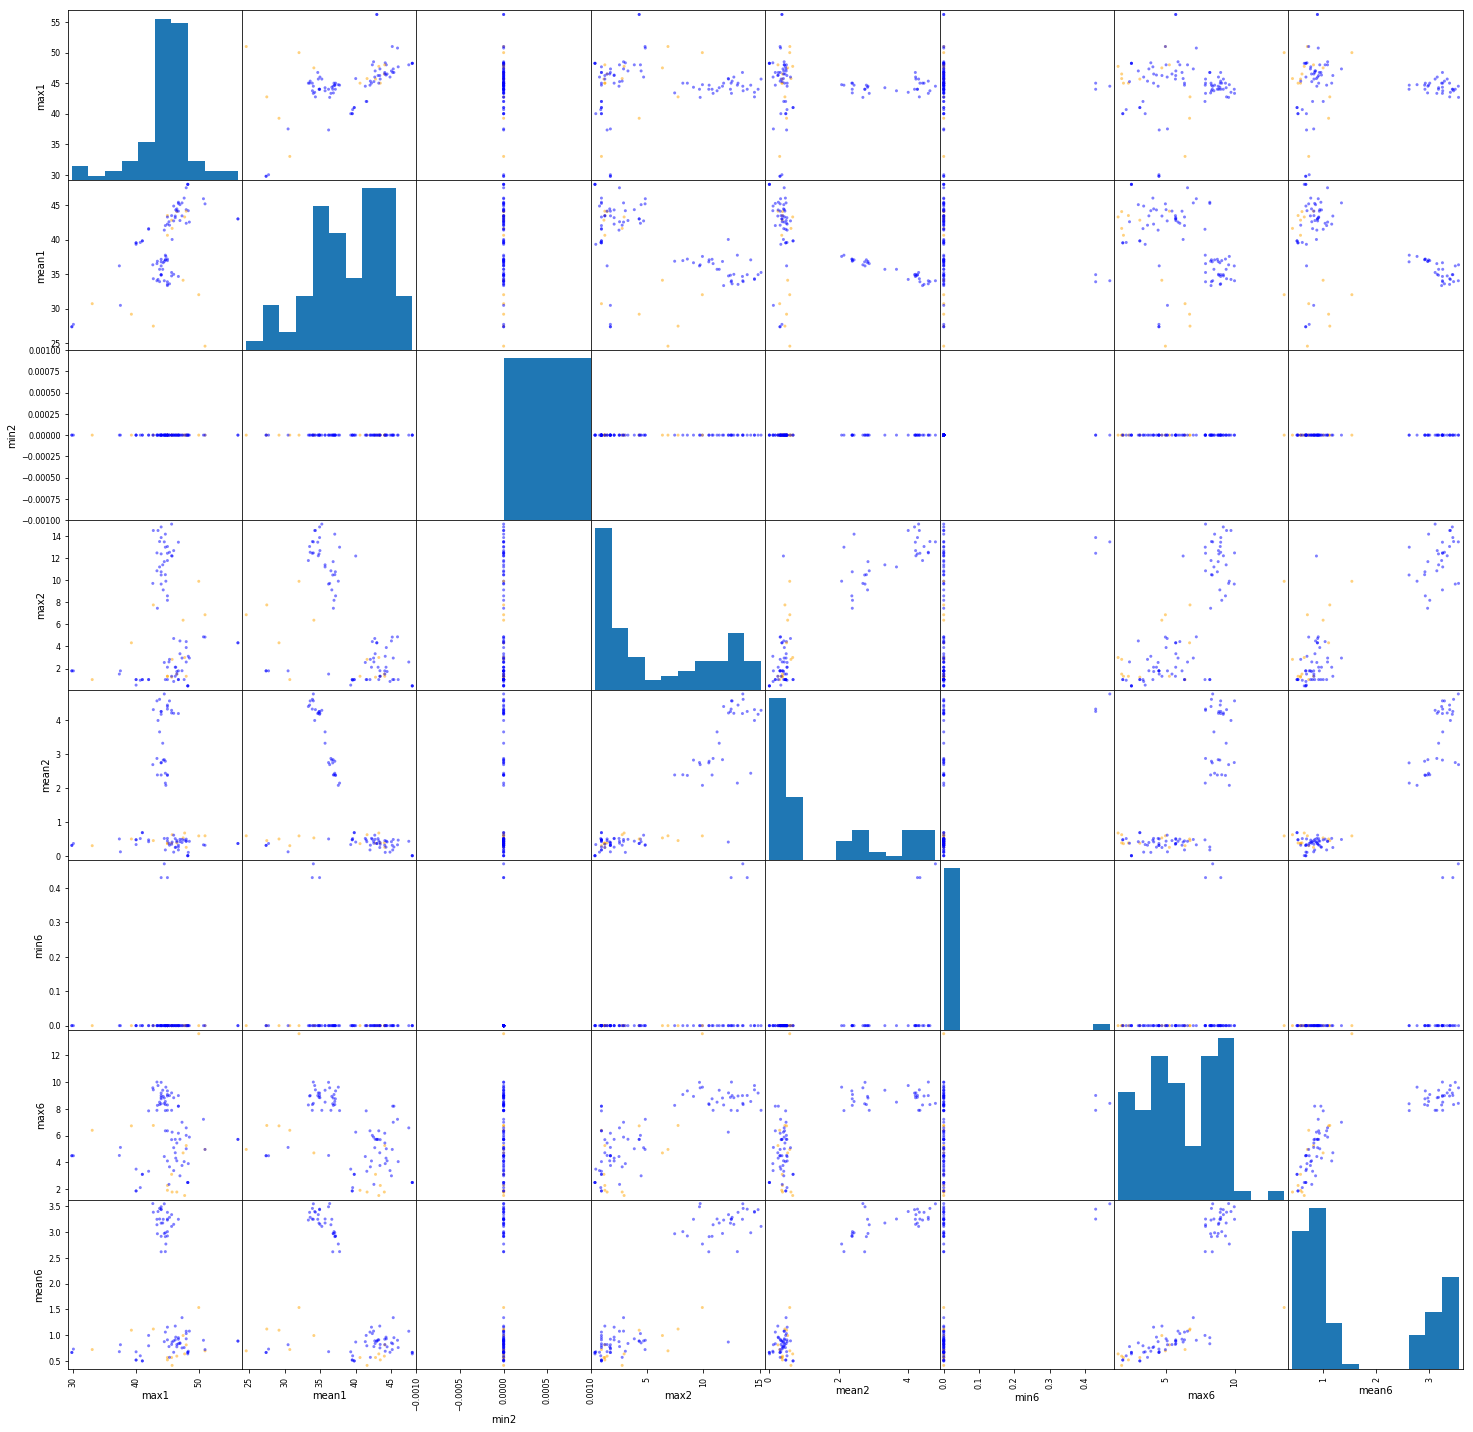

In [324]:
test_2,test_desc_2,train_2,train_desc_2 = stupid_loading(addresslist,2)
All_desc_2 = test_desc_2.append(train_desc_2)
draw_many_plots(All_desc_2[['min1', 'max1', 'mean1', 'min2', 
                         'max2', 'mean2', 'min6', 'max6', 'mean6', 'bending???']])

Answer: It seems that, after breaking into 2 part, the picture looks more scattered.

# Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression4 to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.5 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to de- termine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem.6 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.

In [31]:
def normalize(df):
    x = df.values 
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

In [18]:
test_3,test_desc_3,train_3,train_desc_3 = stupid_loading(addresslist,5)
for i in range(1,7):
    test_desc_3 = test_desc_3.drop(columns=['std'+str(i), '1st quart'+str(i),'2nd quart'+str(i),'3rd quart'+str(i)])
    
train_y = train_desc_3.iloc[:,-1]


In [530]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
pd.set_option('display.max_columns', 50) 
score_list = []

for L in range(1,21):
    test_3,test_desc_3,train_3,train_desc_3 = stupid_loading(addresslist,L)
    for i in range(1,7):
        test_desc_3 = test_desc_3.drop(columns=['std'+str(i), '1st quart'+str(i),'2nd quart'+str(i),'3rd quart'+str(i)])
    for i in range(1,7):
        train_desc_3 = train_desc_3.drop(columns=['std'+str(i), '1st quart'+str(i),'2nd quart'+str(i),'3rd quart'+str(i)])
    train_X = train_desc_3.iloc[:, 0:-1]
    train_y = train_desc_3.iloc[:,-1]
    train_y = train_y.astype('int')
    test_X = test_desc_3.iloc[:, 0:-1]
    test_y = test_desc_3.iloc[:,-1]
    #aviod imbalance
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    score_f1 = []
    score = []
    for train_index, test_index in skf.split(train_X, train_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_, X_skf = train_X.loc[train_index], train_X.loc[test_index]
        y_train_, y_skf = train_y.loc[train_index], train_y.loc[test_index]
        LR = LogisticRegression()  
        rfe =RFE(LR, 8)
        rfe = rfe.fit(X_train_, y_train_.astype('int'))
        #print (rfe.support_)
        #print(rfe.ranking_)
        Good_features = []
        #get pruned set of features' list
        for i in range(len(rfe.support_)):
            if rfe.support_[i]==True:
                Good_features.append(i)
        LR_fit = LR.fit(X_train_[X_train_.columns[Good_features]],y_train_)
        pred_y = LR_fit.predict(X_skf[X_skf.columns[Good_features]])
        score.append(LR.score(X_skf[X_skf.columns[Good_features]],y_skf))
        score_f1.append(f1_score(y_skf, pred_y, average='weighted'))

    #print(score,score_f1)
    score_list.append(score_f1)
score_np_n = np.array(score_list)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,0
0,0.967238
1,0.983619
2,1.000000
3,0.986832
4,0.986845
5,0.986832
6,0.986832
7,0.970464
8,0.960497
9,0.957296


In [16]:
#try stupid_loading_b
score_list = []
score_list_f1 = []

for L in range(1,5):
    test_3,test_desc_3,train_3,train_desc_3 = stupid_loading_b(addresslist,L)
    for i in range(1,7):
        for j in range(1,(L+1)):
            test_desc_3 = test_desc_3.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
    for i in range(1,7):
        for j in range(1,(L+1)):
            train_desc_3 = train_desc_3.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
    train_X = train_desc_3.iloc[:, 0:-1]
    train_y = train_desc_3.iloc[:,-1]
    train_y = train_y.astype('int')
    test_X = test_desc_3.iloc[:, 0:-1]
    test_y = test_desc_3.iloc[:,-1]
    
    ###   normalized   ###
    '''
    columns = train_X.columns
    train_X = preprocessing.scale(train_X)
    train_X = pd.DataFrame(train_X,columns=columns)
    '''
    ###   aviod imbalance   ###
    skf = StratifiedKFold(n_splits=5,shuffle=True)
    score_f1 = []
    score = []
    for train_index, test_index in skf.split(train_X, train_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_, X_skf = train_X.loc[train_index], train_X.loc[test_index]
        y_train_, y_skf = train_y.loc[train_index], train_y.loc[test_index]
        LR = LogisticRegression()  
        rfe =RFE(LR, 8)
        rfe = rfe.fit(X_train_, y_train_.astype('int'))
        #print (rfe.support_)
        #print(rfe.ranking_)
        Good_features = []
        #get pruned set of features' list
        for i in range(len(rfe.support_)):
            if rfe.support_[i]==True:
                Good_features.append(i)
        LR_fit_b_rfe = LR.fit(X_train_[X_train_.columns[Good_features]],y_train_)
        pred_y = LR_fit_b_rfe.predict(X_skf[X_skf.columns[Good_features]])
        score.append(LR.score(X_skf[X_skf.columns[Good_features]],y_skf))
        score_f1.append(f1_score(y_skf, pred_y, average='weighted'))

    #print(score,score_f1)
    score_list_f1.append(score_f1)
    score_list.append(score)
print(score_list)


/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[1.0, 1.0, 0.9285714285714286, 1.0, 1.0], [1.0, 1.0, 0.8571428571428571, 1.0, 1.0], [0.9285714285714286, 0.9285714285714286, 0.8571428571428571, 1.0, 1.0], [0.9285714285714286, 1.0, 1.0, 0.8571428571428571, 1.0]]


/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
X_skf.shape

(13, 72)

In [512]:
score_np = np.array(score_list)
score_df = pd.DataFrame(score_np.mean(axis=1))
display(score_df)
score_np_f1 = np.array(score_list_f1)
score_df_f1 = pd.DataFrame(score_np_f1.mean(axis=1))
display(score_df_f1)
### RFE Normalize(score, f1score)  ###

,0
0,0.957143
1,0.927473
2,0.956044
3,0.956044
4,0.941758
5,0.970330
6,0.957143
7,0.913187
8,0.913187
9,0.941758


,0
0,0.958261
1,0.922324
2,0.957296
3,0.957296
4,0.945106
5,0.973677
6,0.958511
7,0.916534
8,0.901753
9,0.944129


In [33]:
#try stupid_loading_b
def select_L_ref(n):
    score_list = []
    score_list_f1 = []
    score_list_auc = []
    
    for L in range(1,21):
        test_3,test_desc_3,train_3,train_desc_3 = stupid_loading_b(addresslist,L)
        for i in range(1,7):
            for j in range(1,(L+1)):
                test_desc_3 = test_desc_3.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        for i in range(1,7):
            for j in range(1,(L+1)):
                train_desc_3 = train_desc_3.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        train_X = train_desc_3.iloc[:, 0:-1]
        train_y = train_desc_3.iloc[:,-1]
        train_y = train_y.astype('int')
        test_X = test_desc_3.iloc[:, 0:-1]
        test_y = test_desc_3.iloc[:,-1]

        ###   normalized   ###
        if n == 1:
            train_X = normalize(train_X)

        ###   aviod imbalance   ###
        skf = StratifiedKFold(n_splits=5,shuffle=True)
        score = []
        score_f1 = []
        score_auc = []
        for train_index, test_index in skf.split(train_X, train_y):
            
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train_, X_skf = train_X.loc[train_index], train_X.loc[test_index]
            y_train_, y_skf = train_y.loc[train_index], train_y.loc[test_index]
            LR = LogisticRegression()  
            rfe =RFE(LR, 8)
            rfe = rfe.fit(X_train_, y_train_.astype('int'))
            #print (rfe.support_)
            #print(rfe.ranking_)
            Good_features = []
            #get pruned set of features' list
            for i in range(len(rfe.support_)):
                if rfe.support_[i]==True:
                    Good_features.append(i)
            LR_fit_b_rfe = LR.fit(X_train_[X_train_.columns[Good_features]],y_train_)
            pred_y = LR_fit_b_rfe.predict(X_skf[X_skf.columns[Good_features]])
            score.append(LR.score(X_skf[X_skf.columns[Good_features]],y_skf))
            score_f1.append(f1_score(y_skf, pred_y, average='weighted'))
            score_auc.append(roc_auc_score(y_skf,pred_y))
        #print(score,score_f1)
        score_list_f1.append(score_f1)
        score_list.append(score)
        score_list_auc.append(score_auc)
    return(score_list,score_list_f1,score_list_auc)


In [122]:
### without normalize and ref###
score_list1,score_list_f11,score_list_auc1 = select_L_ref(0)
### score ###
score_np_n = np.array(score_list1)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/

,0
0,0.971429
1,0.984615
2,0.941758
3,0.942857
4,0.957143
5,0.956044
6,0.957143
7,0.971429
8,0.971429
9,0.942857


In [123]:
### score_f1 ###
score_np_n = np.array(score_list_f11)
score_df_ref = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df_ref)

,0
0,0.958242
1,0.986845
2,0.922305
3,0.937689
4,0.954070
5,0.947682
6,0.945074
7,0.970451
8,0.967238
9,0.925480


In [124]:
### score_auc ###
score_np_n = np.array(score_list_auc1)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

,0
0,0.900000
1,0.991667
2,0.791667
3,0.883333
4,0.891667
5,0.841667
6,0.891667
7,0.941667
8,0.900000
9,0.800000


In [125]:
### normalize and ref###
score_list2,score_list_f12,score_list_auc2 = select_L_ref(1)
### score ###
score_np_n = np.array(score_list2)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/

,0
0,0.913187
1,0.913187
2,0.914286
3,0.914286
4,0.913187
5,0.913187
6,0.913187
7,0.914286
8,0.898901
9,0.870330


In [127]:
### f1 score ###
score_np_n = np.array(score_list_f12)
score_df_ref_n = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df_ref_n)

,0
0,0.886330
1,0.877333
2,0.883722
3,0.883722
4,0.877333
5,0.886330
6,0.886330
7,0.883722
8,0.860952
9,0.823385


In [128]:
### auc score ###
score_np_n = np.array(score_list_auc2)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

,0
0,0.650000
1,0.650000
2,0.700000
3,0.700000
4,0.650000
5,0.650000
6,0.650000
7,0.700000
8,0.600000
9,0.541667


In [40]:
#try stupid_loading_b with refcv

def select_L_refcv(n):
    score_list = []
    score_list_f1 = []
    score_list_auc = []
    for L in range(1,21):
        test_3,test_desc_3,train_3,train_desc_3 = stupid_loading_b(addresslist,L)
        for i in range(1,7):
            for j in range(1,(L+1)):
                test_desc_3 = test_desc_3.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        for i in range(1,7):
            for j in range(1,(L+1)):
                train_desc_3 = train_desc_3.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        train_X = train_desc_3.iloc[:, 0:-1]
        train_y = train_desc_3.iloc[:,-1]
        train_y = train_y.astype('int')
        test_X = test_desc_3.iloc[:, 0:-1]
        test_y = test_desc_3.iloc[:,-1]

        ###   normalized   ###
        if n==1:
            columns = train_X.columns
            train_X = preprocessing.scale(train_X)
            train_X = pd.DataFrame(train_X,columns=columns)

        ###   aviod imbalance   ###
        skf = StratifiedKFold(n_splits=5,shuffle=True)
        score = []
        score_f1 = []
        score_auc = []
        for train_index, test_index in skf.split(train_X, train_y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train_, X_skf = train_X.loc[train_index], train_X.loc[test_index]
            y_train_, y_skf = train_y.loc[train_index], train_y.loc[test_index]
            LR = LogisticRegression()  
            selector = RFECV(estimator=LR, cv=3)
            selector.fit(X_train_, y_train_.astype('int'))
            #print (rfe.support_)
            #print(rfe.ranking_)
            Good_features = []
            #get pruned set of features' list
            for i in range(len(selector.support_)):
                if selector.support_[i]==True:
                    Good_features.append(i)
            LR_fit_b_rfecv = LR.fit(X_train_[X_train_.columns[Good_features]],y_train_)
            pred_y = LR_fit_b_rfecv.predict(X_skf[X_skf.columns[Good_features]])
            score.append(LR.score(X_skf[X_skf.columns[Good_features]],y_skf))
            score_f1.append(f1_score(y_skf, pred_y, average='weighted'))
            score_auc.append(roc_auc_score(y_skf,pred_y))
        #print(score,score_f1)
        score_list_f1.append(score_f1)
        score_list.append(score)
        score_list_auc.append(score_auc)
    return(score_list,score_list_f1,score_list_auc)
#print(score_list)


In [132]:
### without normalize and ref###
score_list3,score_list_f13,score_list_auc3 = select_L_refcv(0)
### score ###
score_np_n = np.array(score_list3)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/

,0
0,0.984615
1,0.957143
2,0.928571
3,0.940659
4,0.927473
5,0.957143
6,0.957143
7,0.942857
8,0.925275
9,0.957143


In [136]:
### f1 score ###
score_np_n = np.array(score_list_f13)
score_df_refcv = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df_refcv)

,0
0,0.977231
1,0.955048
2,0.913289
3,0.942763
4,0.915538
5,0.957284
6,0.955048
7,0.942857
8,0.918777
9,0.941861


In [137]:
### auc score ###
score_np_n = np.array(score_list_auc3)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

,0
0,0.900000
1,0.891667
2,0.791667
3,0.883333
4,0.833333
5,0.933333
6,0.891667
7,0.883333
8,0.783333
9,0.850000


In [138]:
### normalize and refcv ###
score_list4,score_list_f14,score_list_auc4 = select_L_refcv(1)
### score ###
score_np_n = np.array(score_list4)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ziluli/anaconda3/

,0
0,0.985714
1,0.941758
2,0.971429
3,0.957143
4,0.928571
5,0.957143
6,0.956044
7,0.927473
8,0.942857
9,0.942857


In [139]:
### f1score ###
score_np_n = np.array(score_list_f14)
score_df_refcv_n = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df_refcv_n)

,0
0,0.983619
1,0.940915
2,0.970451
3,0.950857
4,0.926476
5,0.950857
6,0.957296
7,0.915897
8,0.937689
9,0.938667


In [140]:
### auc score ###
score_np_n = np.array(score_list_auc4)
score_df = pd.DataFrame(score_np_n.mean(axis=1))
display(score_df)

,0
0,0.950000
1,0.883333
2,0.941667
3,0.850000
4,0.833333
5,0.850000
6,0.933333
7,0.741667
8,0.841667
9,0.841667


Answer:The right way is that we need put feature selection part in the k-fold CV(use cv first then feature selection), because as the professor mentioned on class that according to different way to divide data, maybe we could have different best features.

In [251]:
score_list__ = []
score_list_auc__ = []
test_,test_desc_,train_,train_desc_ = stupid_loading_c(addresslist,1)
train_X = train_desc_.iloc[:, 0:-1]
train_y = train_desc_.iloc[:,-1]
train_y = train_y.astype('int')
test_X = test_desc_.iloc[:, 0:-1]
test_y = test_desc_.iloc[:,-1]

###   normalized   ###
train_X = normalize(train_X)
test_X = normalize(test_X)
###   aviod imbalance   ###
skf = StratifiedKFold(n_splits=5,shuffle=True)
score = []
score_auc = []
LR = LogisticRegression()  
selector = RFECV(estimator=LR, cv=3)
selector.fit(train_X, train_y.astype('int'))

Good_features = []
#get pruned set of features' list
for i in range(len(selector.support_)):
    if selector.support_[i]==True:
        Good_features.append(i)
LR_fit_b_rfecv = LR.fit(train_X[train_X.columns[Good_features]],train_y)
pred_y = LR_fit_b_rfecv.predict(test_X[test_X.columns[Good_features]])
score.append(LR.score(test_X[test_X.columns[Good_features]],test_y))
score_auc.append(roc_auc_score(test_y,pred_y))
#print(score,score_f1)
score_list__.append(score)
score_list_auc__.append(score_auc)


In [252]:
score_np_n__ = np.array(score_list_auc__)
score_df__ = pd.DataFrame(score_np_n__.mean(axis=1))
display(score_df__)

,0
0,1.0


In [253]:
score_np_n__ = np.array(score_list__)
score_df__ = pd.DataFrame(score_np_n__.mean(axis=1))
display(score_df__)

,0
0,1.0


# Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [50]:
from sklearn import metrics
def AUC_ROC_refcv(train_X,train_y,test_X,test_y):
    LR = LogisticRegression()  
    selector = RFECV(estimator=LR, cv=3)
    selector.fit(train_X, train_y.astype('int'))
    Good_features = []
        #get pruned set of features' list
    for i in range(len(selector.support_)):
        if selector.support_[i]==True:
            Good_features.append(i)
    LR_fit_b_rfecv2 = LR.fit(train_X[train_X.columns[Good_features]],train_y)
    pred_y = LR_fit_b_rfecv2.predict(train_X[train_X.columns[Good_features]])
    #score_y = LR.decision_function(train_X[train_X.columns[Good_features]])
    pred_y_test = LR_fit_b_rfecv2.predict(test_X[test_X.columns[Good_features]])
    #score_y_test = LR.decision_function(test_X[test_X.columns[Good_features]])
    #probas_ = LR_fit_b_rfecv2.predict_proba(test_X[test_X.columns[Good_features]])
    #confusion matrix
    c_m = metrics.confusion_matrix(train_y, pred_y)
    print(c_m)
    #ROC
    #fpr, tpr, thresholds = metrics.roc_curve(train_y, score_y, pos_label=1)
    fpr, tpr, thresholds = metrics.roc_curve(train_y, pred_y)

    #AUC
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC')
    plt.legend(loc="lower right")
    plt.show()
    #p-value
    print(Good_features)
    newX = sm.add_constant(train_X[train_X.columns[Good_features]])
    est = sm.Logit(train_y, train_X[train_X.columns[Good_features]]).fit(method="bfgs")
    print(est.summary())
    return(LR_fit_b_rfecv2,Good_features)

In [51]:
from sklearn import metrics
def AUC_ROC_ref(train_X,train_y,test_X,test_y):
    LR = LogisticRegression(max_iter=1000)  
    rfe = RFE(LR, 8)
    rfe.fit(train_X, train_y.astype('int'))
    Good_features = []
        #get pruned set of features' list
    for i in range(len(rfe.support_)):
        if rfe.support_[i]==True:
            Good_features.append(i)
    LR_fit_b_rfe2 = LR.fit(train_X[train_X.columns[Good_features]],train_y)
    pred_y = LR_fit_b_rfe2.predict(train_X[train_X.columns[Good_features]])
    score_y = LR.decision_function(train_X[train_X.columns[Good_features]])
    pred_y_test = LR_fit_b_rfe2.predict(test_X[test_X.columns[Good_features]])
    score_y_test = LR.decision_function(test_X[test_X.columns[Good_features]])
    #confusion matrix
    c_m = metrics.confusion_matrix(train_y, pred_y)
    print(c_m)
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(train_y, pred_y)
    #AUC
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC')
    plt.legend(loc="lower right")
    plt.show()
    #p-value
    print(Good_features)
    newX = sm.add_constant(train_X[train_X.columns[Good_features]])
    est = sm.Logit(train_y, train_X[train_X.columns[Good_features]]).fit(method="bfgs")
    print(est.summary())
    return(LR_fit_b_rfe2,Good_features)

In [52]:
def AUC_ROC(train_X,train_y):
    LR = LogisticRegression(max_iter=1000)  
    LR_fit = LR.fit(train_X,train_y)
    pred_y = LR_fit.predict(train_X)
    score_y = LR.decision_function(train_X)
    #confusion matrix
    c_m = metrics.confusion_matrix(train_y, pred_y)
    print(c_m)
    #ROC
    fpr, tpr, thresholds = metrics.roc_curve(train_y, score_y, pos_label=1)
    #AUC
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC and AUC')
    plt.legend(loc="lower right")
    plt.show()
    #p-value
    print(Good_features)
    newX = sm.add_constant(train_X)
    est = sm.Logit(train_y, train_X).fit(method="bfgs")
    print(est.summary())

In [48]:
test_4,test_desc_4,train_4,train_desc_4 = stupid_loading_c(addresslist,1)

[[ 9  0]
 [ 0 60]]


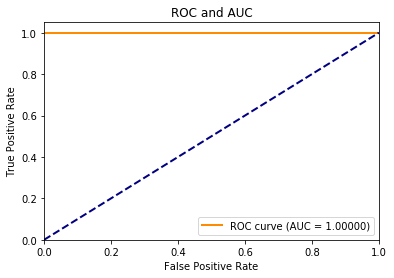

[0, 1, 5, 9, 12, 13, 14, 15]
         Current function value: 0.352131
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:             bending???   No. Observations:                   69
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                 0.09060
Time:                        13:02:15   Log-Likelihood:                -24.297
converged:                      False   LL-Null:                       -26.718
                                        LLR p-value:                    0.6793
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean11         0.0363      0.572      0.063    

/Users/ziluli/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [105]:
### normalize ###
train_X = train_desc_4.iloc[:, 0:-1]
#'''
columns = train_X.columns
train_X = preprocessing.scale(train_X)
train_X = pd.DataFrame(train_X,columns=columns)

test_X = test_desc_4.iloc[:, 0:-1]
#'''
columns = test_X.columns
test_X = preprocessing.scale(test_X)
test_X = pd.DataFrame(test_X,columns=columns)
#'''
train_y = train_desc_4.iloc[:,-1]
train_y = train_y.astype('int')

test_y = test_desc_4.iloc[:,-1]
test_y = test_y.astype('int')
### REF ###
selector1,gf1 = AUC_ROC_ref(train_X,train_y,test_X,test_y)


[[ 8  1]
 [ 1 59]]


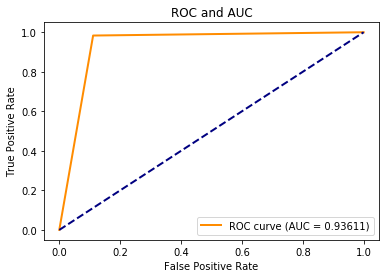

[13, 14, 15]
Optimization terminated successfully.
         Current function value: 0.371015
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
                           Logit Regression Results                           
Dep. Variable:             bending???   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                 0.04183
Time:                        13:02:15   Log-Likelihood:                -25.600
converged:                       True   LL-Null:                       -26.718
                                        LLR p-value:                    0.3271
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
min51         -2.8026    

In [106]:
### REFCV ###
selector2,gf2 = AUC_ROC_refcv(train_X,train_y,test_X,test_y)


[[ 9  0]
 [ 0 60]]


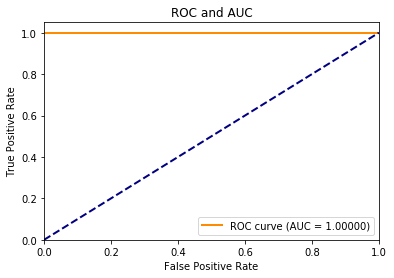

[0, 3, 5, 6, 12, 13, 14, 15]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                           Logit Regression Results                           
Dep. Variable:             bending???   No. Observations:                   69
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                   1.000
Time:                        12:48:58   Log-Likelihood:            -1.0963e-05
converged:                       True   LL-Null:                       -26.718
                                        LLR p-value:                 3.041e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean11   

In [53]:
### without normalize ###
train_X = train_desc_4.iloc[:, 0:-1]
test_X = test_desc_4.iloc[:, 0:-1]
train_y = train_desc_4.iloc[:,-1]
train_y = train_y.astype('int')
test_y = test_desc_4.iloc[:,-1]
test_y = test_y.astype('int')
### REF ###
selector3,gf3 = AUC_ROC_ref(train_X,train_y,test_X,test_y)


[[ 9  0]
 [ 0 60]]


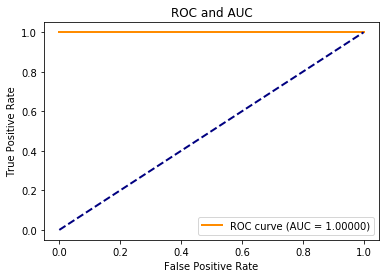

[0, 1, 3, 5, 6, 9, 12, 13, 14, 15, 17]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:             bending???   No. Observations:                   69
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                   1.000
Time:                        12:49:03   Log-Likelihood:            -1.0283e-05
converged:                       True   LL-Null:                       -26.718
                                        LLR p-value:                 6.181e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [54]:
### REFCV ###
selector4,gf4 = AUC_ROC_refcv(train_X,train_y,test_X,test_y)

# Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [153]:
test_X = test_desc_4.iloc[:, 0:-1]
#'''
test_X = normalize(test_X)
#'''
test_y = test_desc_4.iloc[:,-1]
test_y = test_y.astype('int')


In [154]:
### normalize & ref ###
pred_y_test = selector1.predict(test_X[test_X.columns[gf1]])
test_score = f1_score(test_y, pred_y_test, average='weighted')
n1 = np.array([test_score,score_df_ref_n[0][0]])
a1 = pd.DataFrame(n1.reshape(1,2),columns = ['test','cv'])
a1

/Users/ziluli/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,test,cv
0,0.696594,0.88633


In [155]:
### normalize & refcv ###
pred_y_test = selector2.predict(test_X[test_X.columns[gf2]])
test_score = f1_score(test_y, pred_y_test, average='weighted')
n2 = np.array([test_score,score_df_refcv_n[0][0]])
a2 = pd.DataFrame(n2.reshape(1,2),columns = ['test','cv'])
a2

,test,cv
0,0.880482,0.983619


In [156]:
test_X = test_desc_4.iloc[:, 0:-1]
test_y = test_desc_4.iloc[:,-1]
test_y = test_y.astype('int')

In [157]:
### only ref ###
pred_y_test = selector3.predict(test_X[test_X.columns[gf1]])
test_score = f1_score(test_y, pred_y_test, average='weighted')
n3 = np.array([test_score,score_df_ref[0][0]])
a3 = pd.DataFrame(n3.reshape(1,2),columns = ['test','cv'])
a3

,test,cv
0,1.0,0.958242


In [158]:
### only refcv ###
pred_y_test = selector3.predict(test_X[test_X.columns[gf1]])
test_score = f1_score(test_y, pred_y_test, average='weighted')
n4 = np.array([test_score,score_df_refcv[0][0]])
a4 = pd.DataFrame(n4.reshape(1,2),columns = ['test','cv'])
a4

,test,cv
0,1.0,0.977231


# Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?


of course

# From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

imbalance,bending is relatively rare class. I will try 2 ways(smote and downsampling)

In [211]:
train_desc_4[train_desc_4['bending???']==0]

,mean11,min11,max11,mean21,min21,max21,mean31,min31,max31,mean41,min41,max41,mean51,min51,max51,mean61,min61,max61,bending???
0,43.954500,35.00,47.40,0.426250,0.0,1.70,22.122354,6.50,29.75,0.497313,0.0,4.44,35.588458,29.00,38.50,0.493292,0.0,1.79,0
1,42.179813,33.00,47.75,0.696042,0.0,3.00,22.183625,8.50,30.00,0.989917,0.0,5.15,33.493917,20.00,38.67,0.613521,0.0,2.18,0
2,41.678063,33.00,45.75,0.535979,0.0,2.83,19.006562,3.00,28.25,0.841875,0.0,6.42,29.857083,23.67,37.50,0.383292,0.0,1.79,0
3,43.454958,37.00,48.00,0.378083,0.0,1.58,15.793333,5.75,27.00,0.849354,0.0,10.03,23.034792,8.00,33.50,0.679646,0.0,5.26,0
4,43.969125,36.25,48.00,0.413125,0.0,1.50,15.868021,1.50,26.33,0.666354,0.0,5.17,22.103750,11.33,30.75,0.555313,0.0,2.96,0
5,32.586208,21.00,50.00,0.516125,0.0,9.90,13.941625,0.00,28.25,0.868896,0.0,7.40,20.345708,5.00,33.75,1.162042,0.0,13.61,0
6,29.881938,27.50,33.00,0.256438,0.0,1.00,8.166250,0.00,14.50,0.544646,0.0,4.44,18.117896,11.00,23.25,0.701625,0.0,6.40,0
7,30.938104,19.00,45.50,0.467167,0.0,6.40,14.589833,0.00,32.75,0.777542,0.0,11.42,18.389083,1.67,36.00,1.107354,0.0,6.73,0
8,31.058250,25.00,47.50,0.405458,0.0,6.38,15.296667,2.00,28.33,0.823542,0.0,5.32,14.407187,0.00,40.33,1.098104,0.0,4.92,0


In [179]:
import random
from sklearn.neighbors import NearestNeighbors

class Smote:
    def __init__(self,samples,N=15,k=5):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
       # self.synthetic=np.zeros((self.n_samples*N,self.n_attrs))

    def over_sampling(self):
        N=int(self.N/100)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)
        print ('neighbors',neighbors)
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            #print nnarray
            self._populate(N,i,nnarray)
        return self.synthetic


    # for each minority class samples,choose N of the k nearest neighbors and generate N synthetic samples.
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1
s=Smote(train_desc_4[train_desc_4['bending???']==0].values,N=0)
la = s.over_sampling()
la.shape

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)


(0, 19)

In [180]:
cases = pd.DataFrame(la,columns=train_desc_4.columns)
train_smote = train_desc_4.append(cases,ignore_index=True)


[[ 8  1]
 [ 1 59]]


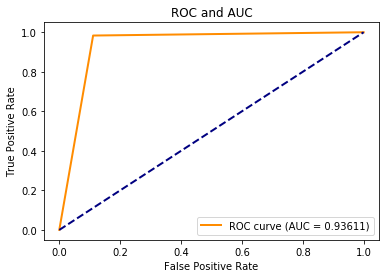

[13, 14, 15]
Optimization terminated successfully.
         Current function value: 0.371015
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
                           Logit Regression Results                           
Dep. Variable:             bending???   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                 0.04183
Time:                        14:51:55   Log-Likelihood:                -25.600
converged:                       True   LL-Null:                       -26.718
                                        LLR p-value:                    0.3271
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
min51         -2.8026    

In [181]:
train_X2 = train_smote.iloc[:, 0:-1]
#'''
columns = train_X2.columns
train_X2 = preprocessing.scale(train_X2)
train_X2 = pd.DataFrame(train_X2,columns=columns)
#'''
train_y2 = train_smote.iloc[:,-1]
train_y2 = train_y2.astype('int')
#'''
test_X2 = test_desc_4.iloc[:, 0:-1]

columns = test_X.columns
test_X2 = preprocessing.scale(test_X2)
test_X2 = pd.DataFrame(test_X2,columns=columns)

test_y2 = test_desc_4.iloc[:,-1]
test_y2 = test_y2.astype('int')

selector_smote_n,gf_smote_n = AUC_ROC_refcv(train_X2,train_y2,test_X2,test_y2)


In [186]:
train_desc_4

,mean11,min11,max11,mean21,min21,max21,mean31,min31,max31,mean41,min41,max41,mean51,min51,max51,mean61,min61,max61,bending???
0,43.954500,35.00,47.40,0.426250,0.0,1.70,22.122354,6.50,29.75,0.497313,0.0,4.44,35.588458,29.00,38.50,0.493292,0.00,1.79,0
1,42.179813,33.00,47.75,0.696042,0.0,3.00,22.183625,8.50,30.00,0.989917,0.0,5.15,33.493917,20.00,38.67,0.613521,0.00,2.18,0
2,41.678063,33.00,45.75,0.535979,0.0,2.83,19.006562,3.00,28.25,0.841875,0.0,6.42,29.857083,23.67,37.50,0.383292,0.00,1.79,0
3,43.454958,37.00,48.00,0.378083,0.0,1.58,15.793333,5.75,27.00,0.849354,0.0,10.03,23.034792,8.00,33.50,0.679646,0.00,5.26,0
4,43.969125,36.25,48.00,0.413125,0.0,1.50,15.868021,1.50,26.33,0.666354,0.0,5.17,22.103750,11.33,30.75,0.555313,0.00,2.96,0
5,32.586208,21.00,50.00,0.516125,0.0,9.90,13.941625,0.00,28.25,0.868896,0.0,7.40,20.345708,5.00,33.75,1.162042,0.00,13.61,0
6,29.881938,27.50,33.00,0.256438,0.0,1.00,8.166250,0.00,14.50,0.544646,0.0,4.44,18.117896,11.00,23.25,0.701625,0.00,6.40,0
7,30.938104,19.00,45.50,0.467167,0.0,6.40,14.589833,0.00,32.75,0.777542,0.0,11.42,18.389083,1.67,36.00,1.107354,0.00,6.73,0
8,31.058250,25.00,47.50,0.405458,0.0,6.38,15.296667,2.00,28.33,0.823542,0.0,5.32,14.407187,0.00,40.33,1.098104,0.00,4.92,0
9,36.228396,19.00,44.00,2.831687,0.0,12.28,15.424500,5.50,25.25,3.119125,0.0,9.50,15.872375,2.50,24.50,3.480687,0.00,9.98,1


[31 46 56 25 16  1  7  3 55 27 52 37 17 24 42]
[[ 6  0]
 [ 0 48]]


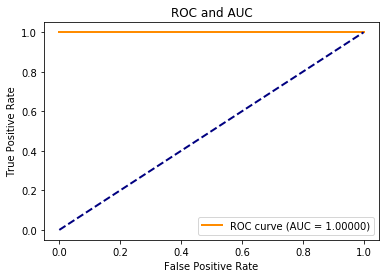

[0, 1, 5, 6, 7, 9, 11, 12, 13, 14, 15]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
                           Logit Regression Results                           
Dep. Variable:             bending???   No. Observations:                   54
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Oct 2018   Pseudo R-squ.:                   1.000
Time:                        14:58:47   Log-Likelihood:            -8.5619e-06
converged:                       True   LL-Null:                       -18.837
                                        LLR p-value:                 4.325e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

In [189]:
# try downsampling for non normalize
randomSampleList = np.random.choice(60, 15, replace=False)
print(randomSampleList)
#'''
train_dsp = train_desc_4.drop(randomSampleList)
train_X3 = train_dsp.iloc[:, 0:-1]
train_y3 = train_dsp.iloc[:,-1]
train_y3 = train_y3.astype('int')
test_X3 = test_desc_4.iloc[:, 0:-1]
test_y3 = test_desc_4.iloc[:,-1]
test_y3 = test_y2.astype('int')
selector_smote,gf_smote = AUC_ROC_refcv(train_X3,train_y3,test_X3,test_y3)
#'''

# (e) Binary Classification Using L1-penalized logistic regression

# i. Repeat 1(d)iii using L1-penalized logistic regression,7 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.8


In [248]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

def l1_LR_1(L):
    '''
    params:
    train:dataset
    test:dataset
    L:break num
    n: normalize or not
    '''
    score_list = []

    for L in range(1,(L+1)):
        print(L)
        test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_c(addresslist,L)
        '''
        for i in range(1,7):
            for j in range(1,(L+1)):
                test_desc_5 = test_desc_5.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        for i in range(1,7):
            for j in range(1,(L+1)):
                train_desc_5 = train_desc_5.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        '''
        train_X = train_desc_5.iloc[:, 0:-1]
        train_y = train_desc_5.iloc[:,-1]
        train_y = train_y.astype('int')
        test_X = test_desc_5.iloc[:, 0:-1]
        test_y = test_desc_5.iloc[:,-1]
        test_y = test_y.astype('int')

        ###   normalized   ###
        '''
        columns = train_X.columns
        train_X = preprocessing.scale(train_X)
        train_X = pd.DataFrame(train_X,columns=columns)
        test_X = preprocessing.scale(test_X)
        test_X = pd.DataFrame(test_X,columns=columns)
        '''
        model = LogisticRegressionCV(penalty='l1', solver='liblinear',  Cs=10, refit=True)
        Nfold = 5
        skf = StratifiedKFold(n_splits=Nfold, shuffle=True)
        train_X = normalize(train_X)
        test_X = normalize(test_X)
        #print(train_X.head())
        score = []
        for train_index, test_index in skf.split(train_X, train_y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train_, X_skf = train_X.loc[train_index], train_X.loc[test_index]
            y_train_, y_skf = train_y.loc[train_index], train_y.loc[test_index]
            
            model = model.fit(X_train_, y_train_)
            score.append(model.score(X_skf, y_skf))
        score_list.append(score)
    return(score_list)
    

In [250]:
score_list_l1_ = l1_LR_1(20)
score_np_l1_ = np.array(score_list_l1_)
#score_df_l1_ = pd.DataFrame(score_np_l1_)
score_df_l1_ = pd.DataFrame(score_np_l1_.mean(axis=1))
display(score_df_l1_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


,0
0,1.000000
1,0.956044
2,0.941758
3,0.927473
4,0.897802
5,0.897802
6,0.898901
7,0.913187
8,0.898901
9,0.898901


In [255]:
from sklearn.linear_model import LogisticRegressionCV
def l1_LR_(L):
    '''
    params:
    train:dataset
    test:dataset
    L:break num
    n: normalize or not
    '''
    score_list = []
    score = []
   
    test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_c(addresslist,L)
    '''
    for i in range(1,7):
        for j in range(1,(L+1)):
            test_desc_5 = test_desc_5.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
    for i in range(1,7):
        for j in range(1,(L+1)):
            train_desc_5 = train_desc_5.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
    '''
    train_X = train_desc_5.iloc[:, 0:-1]
    train_y = train_desc_5.iloc[:,-1]
    train_y = train_y.astype('int')
    test_X = test_desc_5.iloc[:, 0:-1]
    test_y = test_desc_5.iloc[:,-1]
    test_y = test_y.astype('int')

    ###   normalized   ###
    '''
    columns = train_X.columns
    train_X = preprocessing.scale(train_X)
    train_X = pd.DataFrame(train_X,columns=columns)
    test_X = preprocessing.scale(test_X)
    test_X = pd.DataFrame(test_X,columns=columns)
    '''
    train_X = normalize(train_X)
    test_X = normalize(test_X)
    #print(train_X.head())
    model = LogisticRegressionCV(penalty='l1', solver='liblinear',  Cs=10, refit=True)
    model = model.fit(train_X, train_y)
    score_ = model.score(test_X, test_y)
    score.append(score_)
    return(score)
    

In [256]:
print(l1_LR_(1))

[1.0]


# Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

After both data normalized, comparded with both testing score and training score,I cannot tell which one is greater(L1-penalized's performance could be better than using p-value), and L1-penalized is much easier to implement.

# (f) Multi-class Classification (The Realistic Case)

In [275]:
import warnings
warnings.filterwarnings('ignore')
#sort warning

In [276]:
### for multi class!!!  ###

def stupid_loading_d(addresslist,breaknum):
    test = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','category'])
    train = pd.DataFrame(columns=['# Columns: time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13',
       'avg_rss23', 'var_rss23','category'])
    #break the  series
    for address in addresslist:
        #bending 1 & 2
        if address == 'AReM/bending1' or address == 'AReM/bending2':
            #test
            for i in range(1,3):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                init['category'] = address
                if i == 1 and address == 'AReM/bending1':
                    test_desc = init
                else:
                    test_desc = test_desc.append(init,ignore_index=True)
            end = 7
            if address == 'AReM/bending1':
                end = end + 1
            #train
            for j in range(3,end):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                init['category'] = address
                if j == 3 and address == 'AReM/bending1':
                    train_desc = init
                else:
                    train_desc = train_desc.append(init,ignore_index=True)
        # other dataset
        else:
            #test
            for i in range(1,4):
                temp = pd.read_csv(address+'/dataset'+str(i)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.ones(temp.shape[0], dtype=np.int)
                test = test.append(temp,ignore_index=True)
                init['category'] = address
                if i == 1 and address == 'AReM/bending1':
                    test_desc = init
                else:
                    test_desc = test_desc.append(init,ignore_index=True)            #train
            for j in range(4,16):
                temp = pd.read_csv(address+'/dataset'+str(j)+'.csv',header = 4,error_bad_lines=False)
                stop_sign = int(temp.shape[0]/breaknum)
                for k in range(breaknum):
                    temp2 = temp[stop_sign*k:stop_sign*(k+1)]
                    temp_ = merge_desc_b(temp2,(k+1))
                    if k == 0:
                        init = temp_
                    else:
                        init = pd.concat([init,temp_],axis=1)
                temp['bending???'] = np.zeros(temp.shape[0], dtype=np.int)
                train = train.append(temp,ignore_index=True) 
                init['category'] = address
                if j == 3 and address == 'AReM/bending1':
                    train_desc = init
                else:
                    train_desc = train_desc.append(init,ignore_index=True)
    for i in range(1,7):
        for j in range(1,(breaknum+1)):
            test_desc = test_desc.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
    for i in range(1,7):
        for j in range(1,(breaknum+1)):
            train_desc = train_desc.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])  
    return(test,test_desc,train,train_desc)
#test
a,b,c,d = stupid_loading_d(addresslist,1)
b.head()

,mean11,min11,max11,mean21,min21,max21,mean31,min31,max31,mean41,min41,max41,mean51,min51,max51,mean61,min61,max61,category
0,40.624792,37.25,45.00,0.358604,0.0,1.30,19.040937,4.0,29.50,0.832542,0.0,7.23,34.311292,27.25,38.25,0.570583,0.0,1.92,AReM/bending1
1,42.812812,38.00,45.67,0.372438,0.0,1.22,20.096979,2.0,29.50,0.876438,0.0,5.76,33.024583,27.67,38.50,0.571083,0.0,3.11,AReM/bending1
2,24.562958,12.75,51.00,0.590833,0.0,6.87,19.121333,0.0,25.33,0.736771,0.0,6.76,23.493042,10.67,30.00,0.700188,0.0,4.97,AReM/bending2
3,27.464604,0.00,42.75,0.449708,0.0,7.76,20.842542,7.5,35.00,0.779917,0.0,5.76,17.617937,0.00,33.00,1.122125,0.0,6.76,AReM/bending2
4,37.177042,24.25,45.00,2.374208,0.0,8.58,16.531083,5.5,26.75,2.910604,0.0,8.05,19.607250,7.00,25.50,2.921729,0.0,9.34,AReM/cycling


In [515]:
'''
from sklearn.preprocessing import OneHotEncoder

def l1_LR_multi(L):
    '''
    params:
    train:dataset
    test:dataset
    L:break num
    n: normalize or not
    '''
    score_list = []

    for L in range(1,(L+1)):
        print(L)
        test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_d(addresslist,L)
        z=0
        for address in addresslist:
            train_desc_5.ix[train_desc_5['category']==address,'category']=z
            test_desc_5.ix[test_desc_5['category']==address,'category']=z
            z = z+1
        '''
        for i in range(1,7):
            for j in range(1,(L+1)):
                test_desc_5 = test_desc_5.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        for i in range(1,7):
            for j in range(1,(L+1)):
                train_desc_5 = train_desc_5.drop(columns=['std'+str(i)+str(j), '1st quart'+str(i)+str(j),'2nd quart'+str(i)+str(j),'3rd quart'+str(i)+str(j)])
        '''
        train_X = train_desc_5.iloc[:, 0:-1]
        train_y = train_desc_5.iloc[:,-1]
        #train_y = train_y.astype('int')
        test_X = test_desc_5.iloc[:, 0:-1]
        test_y = test_desc_5.iloc[:,-1]
        #test_y = test_y.astype('int')
        ###   normalized   ###
        '''
        columns = train_X.columns
        train_X = preprocessing.scale(train_X)
        train_X = pd.DataFrame(train_X,columns=columns)
        test_X = preprocessing.scale(test_X)
        test_X = pd.DataFrame(test_X,columns=columns)
        '''
        train_X = normalize(train_X)
        test_X = normalize(test_X)
        #print(train_X.head())
        
        model = LogisticRegressionCV(cv = 5,penalty='l1', solver='liblinear',  Cs=10, refit=True)
        model = model.fit(train_X, train_y)
        score = model.score(test_X, test_y)
        score_list.append(score)
    return(score_list)
'''    

In [272]:
test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_d(addresslist,1)
z=0
for address in addresslist:
    train_desc_5['category']=train_desc_5['category'].replace([address],[z]) 
    z=z+1
train_desc_5

/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,mean11,min11,max11,mean21,min21,max21,mean31,min31,max31,mean41,min41,max41,mean51,min51,max51,mean61,min61,max61,category
0,43.954500,35.00,47.40,0.426250,0.0,1.70,22.122354,6.50,29.75,0.497313,0.0,4.44,35.588458,29.00,38.50,0.493292,0.00,1.79,0
1,42.179813,33.00,47.75,0.696042,0.0,3.00,22.183625,8.50,30.00,0.989917,0.0,5.15,33.493917,20.00,38.67,0.613521,0.00,2.18,0
2,41.678063,33.00,45.75,0.535979,0.0,2.83,19.006562,3.00,28.25,0.841875,0.0,6.42,29.857083,23.67,37.50,0.383292,0.00,1.79,0
3,43.454958,37.00,48.00,0.378083,0.0,1.58,15.793333,5.75,27.00,0.849354,0.0,10.03,23.034792,8.00,33.50,0.679646,0.00,5.26,0
4,43.969125,36.25,48.00,0.413125,0.0,1.50,15.868021,1.50,26.33,0.666354,0.0,5.17,22.103750,11.33,30.75,0.555313,0.00,2.96,0
5,32.586208,21.00,50.00,0.516125,0.0,9.90,13.941625,0.00,28.25,0.868896,0.0,7.40,20.345708,5.00,33.75,1.162042,0.00,13.61,1
6,29.881938,27.50,33.00,0.256438,0.0,1.00,8.166250,0.00,14.50,0.544646,0.0,4.44,18.117896,11.00,23.25,0.701625,0.00,6.40,1
7,30.938104,19.00,45.50,0.467167,0.0,6.40,14.589833,0.00,32.75,0.777542,0.0,11.42,18.389083,1.67,36.00,1.107354,0.00,6.73,1
8,31.058250,25.00,47.50,0.405458,0.0,6.38,15.296667,2.00,28.33,0.823542,0.0,5.32,14.407187,0.00,40.33,1.098104,0.00,4.92,1
9,36.228396,19.00,44.00,2.831687,0.0,12.28,15.424500,5.50,25.25,3.119125,0.0,9.50,15.872375,2.50,24.50,3.480687,0.00,9.98,2


In [284]:
def find_best_multiclass(L):
    score_list = []

    for L in range(1,(L+1)):
        print(L)
        test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_d(addresslist,L)
        z=0
        from sklearn.preprocessing import label_binarize
        '''
        for address in addresslist:
            train_desc_5.ix[train_desc_5['category']==address,'category']=z
            test_desc_5.ix[test_desc_5['category']==address,'category']=z
            z = z+1
        '''
        for address in addresslist:
            train_desc_5['category']=train_desc_5['category'].replace([address],[z]) 
            test_desc_5['category']=test_desc_5['category'].replace([address],[z]) 
            z=z+1
        train_X = train_desc_5.iloc[:, 0:-1]
        train_y = train_desc_5.iloc[:,-1]

        #train_y = train_y.astype('int')
        test_X = test_desc_5.iloc[:, 0:-1]
        test_y = test_desc_5.iloc[:,-1]
        model = LogisticRegressionCV(cv = 4,penalty='l1', solver='liblinear',  Cs=10, refit=True)
        Nfold = 5
        skf = StratifiedKFold(n_splits=Nfold, shuffle=True)
        train_X = normalize(train_X)
        test_X = normalize(test_X)
        #print(train_X.head())
        score = []
        for train_index, test_index in skf.split(train_X, train_y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train_, X_skf = train_X.loc[train_index], train_X.loc[test_index]
            y_train_, y_skf = train_y.loc[train_index], train_y.loc[test_index]
            
            model = model.fit(X_train_, y_train_)
            score.append(model.score(X_skf, y_skf))
        score_list.append(score)

    return(score_list)


In [285]:
score_list_multi = find_best_multiclass(20)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [286]:
score_np_multi = np.array(score_list_multi)
#score_df_l1_ = pd.DataFrame(score_np_l1_)
score_df_multi = pd.DataFrame(score_np_multi.mean(axis=1))
display(score_df_multi)

,0
0,0.679234
1,0.727807
2,0.638480
3,0.619853
4,0.623886
5,0.564439
6,0.625401
7,0.647549
8,0.617647
9,0.651716


In [303]:
def best_multiclass(L):
    
    test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_d(addresslist,L)
    z=0
    from sklearn.preprocessing import label_binarize
    '''
    for address in addresslist:
        train_desc_5.ix[train_desc_5['category']==address,'category']=z
        test_desc_5.ix[test_desc_5['category']==address,'category']=z
        z = z+1
    '''
    for address in addresslist:
        train_desc_5['category']=train_desc_5['category'].replace([address],[z]) 
        test_desc_5['category']=test_desc_5['category'].replace([address],[z]) 
        z=z+1
    train_X = train_desc_5.iloc[:, 0:-1]
    train_y = train_desc_5.iloc[:,-1]

    #train_y = train_y.astype('int')
    test_X = test_desc_5.iloc[:, 0:-1]
    test_y = test_desc_5.iloc[:,-1]

    train_X = normalize(train_X)
    test_X = normalize(test_X)
    model = LogisticRegressionCV(cv = 4,penalty='l1', solver='liblinear',  Cs=20, refit=True)
    model = model.fit(train_X, train_y)
    score = model.score(test_X, test_y)
    score_y = model.decision_function(test_X)
    return(model,score_y,train_X,train_y,test_X,test_y,score)

        

In [304]:
model,score_y,train_X6,train_y6,test_X6,test_y6,score = best_multiclass(2)

In [305]:
score

0.8421052631578947

In [445]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp
from sklearn.multiclass import OneVsRestClassifier


def plot_multiROC(train_y,score_y,test_y):
    y = label_binarize(train_y, classes=[0, 1, 2, 3, 4, 5, 6])
    test_y = label_binarize(test_y, classes=[0, 1, 2, 3, 4, 5, 6])
    n_classes = y.shape[1]
    print(n_classes)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y[:, i], score_y[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), score_y.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw = 2
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

7


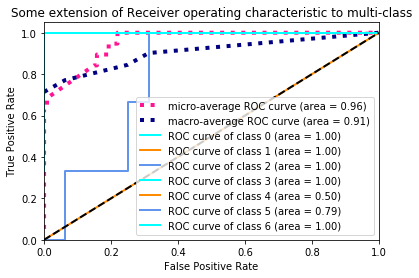

In [446]:
plot_multiROC(train_y6,score_y,test_y6)

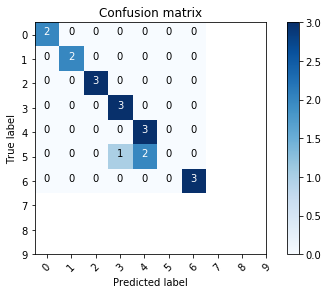

In [452]:
import itertools

def plot_good_cm(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
Y_pred = model.predict(test_X6)
#Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#Y_true = np.argmax(y_val,axis = 1) 
confusion_mtx = metrics.confusion_matrix(test_y6, Y_pred) 
plot_good_cm(confusion_mtx, classes = range(10))

from the confusion matrix above, we can find that it classify 5(standing)poorly

# ii. Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [491]:
from sklearn.naive_bayes import GaussianNB
def gnb_():
    score_list = []
    for L in range(1,21):
        test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_d(addresslist,L)
        z=0
        from sklearn.preprocessing import label_binarize

        for address in addresslist:
            train_desc_5.ix[train_desc_5['category']==address,'category']=z
            test_desc_5.ix[test_desc_5['category']==address,'category']=z
            z = z+1

        train_X = train_desc_5.iloc[:, 0:-1]
        train_y = train_desc_5.iloc[:,-1]

        #train_y = train_y.astype('int')
        test_X = test_desc_5.iloc[:, 0:-1]
        test_y = test_desc_5.iloc[:,-1]

        train_X = normalize(train_X)
        test_X = normalize(test_X)
        gnb = GaussianNB()
        model = gnb.fit(train_X,train_y)
        score = model.score(test_X, test_y)
        score_list.append(score)
    return(score_list)

In [492]:
gnb_()

fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit


[0.7368421052631579,
 0.7894736842105263,
 0.7894736842105263,
 0.8947368421052632,
 0.8947368421052632,
 0.6842105263157895,
 0.8947368421052632,
 0.7894736842105263,
 0.7894736842105263,
 0.8421052631578947,
 0.7894736842105263,
 0.7368421052631579,
 0.7368421052631579,
 0.6842105263157895,
 0.631578947368421,
 0.5263157894736842,
 0.5263157894736842,
 0.6842105263157895,
 0.47368421052631576,
 0.5789473684210527]

In [506]:
from sklearn.naive_bayes import MultinomialNB
def mnb_():
    score_list = []
    for L in range(1,21):
        test_5,test_desc_5,train_5,train_desc_5 = stupid_loading_d(addresslist,L)
        z=0
        from sklearn.preprocessing import label_binarize

        for address in addresslist:
            train_desc_5.ix[train_desc_5['category']==address,'category']=z
            test_desc_5.ix[test_desc_5['category']==address,'category']=z
            z = z+1

        train_X = train_desc_5.iloc[:, 0:-1]
        train_y = train_desc_5.iloc[:,-1]

        #train_y = train_y.astype('int')
        test_X = test_desc_5.iloc[:, 0:-1]
        test_y = test_desc_5.iloc[:,-1]

        train_X = normalize(train_X)
        test_X = normalize(test_X)
        
        mnb = MultinomialNB()
        selector = RFECV(estimator=mnb, cv=3)
        selector.fit(train_X, train_y.astype('int'))
        Good_features = []
            #get pruned set of features' list
        for i in range(len(selector.support_)):
            if selector.support_[i]==True:
                Good_features.append(i)
        LR_fit_b_rfecv2 = mnb.fit(train_X[train_X.columns[Good_features]],train_y)
        score = LR_fit_b_rfecv2.score(test_X[test_X.columns[Good_features]], test_y)
        score_list.append(score)
    return(score_list)

In [494]:
score_list5 = mnb_()

fuck!
fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit
fuck!
fuck!
shit
shit
shit
shit
shit


In [495]:
#non optimze
score_list5

[0.7368421052631579,
 0.631578947368421,
 0.7368421052631579,
 0.6842105263157895,
 0.7368421052631579,
 0.7368421052631579,
 0.6842105263157895,
 0.6842105263157895,
 0.7368421052631579,
 0.6842105263157895,
 0.6842105263157895,
 0.7368421052631579,
 0.6842105263157895,
 0.7368421052631579,
 0.7368421052631579,
 0.7368421052631579,
 0.7894736842105263,
 0.6842105263157895,
 0.7894736842105263,
 0.7894736842105263]

In [507]:
score_list6 = mnb_()

fuck!
fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the cur

fuck!
fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the cur

fuck!
fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the cur

fuck!
fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


fuck!


/Users/ziluli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


fuck!
shit
shit
shit
shit
shit


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


In [508]:
score_list6

[0.6842105263157895,
 0.631578947368421,
 0.7368421052631579,
 0.6842105263157895,
 0.7368421052631579,
 0.7368421052631579,
 0.7368421052631579,
 0.7368421052631579,
 0.7894736842105263,
 0.6842105263157895,
 0.7368421052631579,
 0.631578947368421,
 0.7368421052631579,
 0.6842105263157895,
 0.6842105263157895,
 0.5789473684210527,
 0.7368421052631579,
 0.7368421052631579,
 0.7368421052631579,
 0.6842105263157895]

# iii. Which method is better for multi-class classification in this problem?

Based on score above, L1 norm logistic regression is best for mulit-class classification among all the method above